# <font color='blue'>Assignment: MSE-vs-MAE</font>

In the lecture, we have seen that `Mean Absolute Error` (`MAE`) is more robust to outlier compare to `Mean Square Error` (`MSE`). In this assignment, we have to be a witness to this theory. 

Although we have an intuition that it is bound to happen because the cost of outliers is much more in `MSE` compare to `MAE`. Let's implement and witness it. 

**In this assignment, you have to implement the following:**

- `Mean Square Error (MSE)`


- `Mean Absolute Error (MAE)`


- The gradient with respect to `m` and `c`, when the loss function is `MSE`


- The gradient with respect to `m` and `c`, when the loss function is `MAE`

Codes for training and visualization is already in the notebook.

## <font color='blue'>Marking Scheme</font>

#### Maximum Points: 30

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Problem</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Mean Square Error (MSE)</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Mean Absolute Error (MAE)</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Gradients for MSE</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>Gradients for MAE</h3></td> <td><h3>10</h3></td> </tr>
    </table>
</div>


In [1]:
%matplotlib inline

In [2]:
import torch
import matplotlib.pyplot as plt

from collections import defaultdict


plt.style.use('ggplot')

torch.manual_seed(0)

In [3]:
plt.rcParams["figure.figsize"] = (15, 8)

# <font style="color:green">1. Generate Data </font>
We will generate 1000 data points for the experiment. The `x-axis` is the independent variable which has values randomly distributed between -5 to 5. We assume some values for m and c to create the data points for the dependent variable ( `y-axis` ). We also add some randomness so that the y values are different for the same x. 

Now, we have a simple dataset which has been generated using a linear model in the presence of noise. We have also converted five percent of data into outliers to observe the performance difference between MSE and MAE at the time of training. The data has been dispayed using the scatter plot.

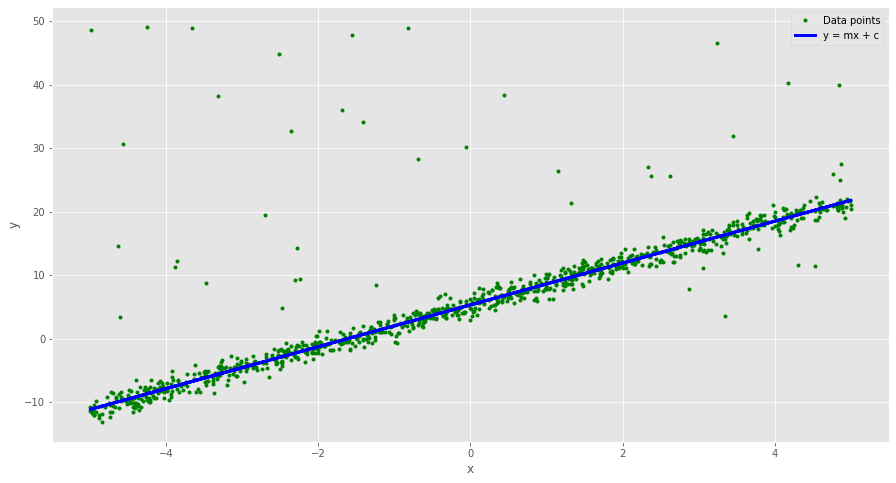

In [5]:
# Generating y = mx + c + random noise
num_data = 1000

# True values of m and c
m_line = 3.3
c_line = 5.3

# input (Generate random data between [-5,5])
x = 10 * torch.rand(num_data) - 5

# Output (Generate data assuming y = mx + c + noise)
y_label = m_line * x + c_line + torch.randn_like(x)

# Add a few outlier
num_outliers = int(0.05 * num_data)
random_index = torch.randint(num_data, (num_outliers,))
y_label[random_index] = 50 * torch.rand(len(random_index))

y = m_line * x + c_line

# Plot the generated data points 
plt.plot(x, y_label, '.', color='g', label="Data points")
plt.plot(x, y, color='b', label='y = mx + c', linewidth=3)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

# <font style="color:green">2. Problem Formulation</font>

The goal is to predict $y$ given some value of $x$. To do this we will fit a line that goes through the data points $(x_i, y_i)$. The equation for such a line is 

$$
y = mx + c
$$

We have a set of data points $(x_i, y_i)$, and they should all satisfy the equation above. i.e., 

$$
y_i = m x_i + c
$$

Unless we have perfect data with no noise, even the best $m$ and $c$ we can find will not perfectly fit the data. So, we will have an **error** or a **residual** given by

$$
e_i = (y_i - m x_i -c) 
$$

We want to find a value of $m$ and $c$ that minimizes the error above. Positive or negative values of error are equally bad for us. So, we are interested in minimizing the square or absolute of the error above. We will see the mean square error (`MSE`) and mean absolute error (`MAE`) and their gradients with respect to m and c. 

# <font style="color:green">3. Loss Functions and their Gradients wrt Learning Parameters.</font>

We need a loss function that can be optimized using gradient descent and updating learnable parameters. Here, we will use two types of loss functions and see which is performing better in the case of outliers in the training data. 


## <font style="color:green">3.1. Mean Square Error (MSE)</font>

**The `mean squared error (MSE)` function which is given by:**

$$
l_{mse} = \frac{1}{N}\sum^N_{i=1}(y_i - m x_i -c)^2 \\
$$

**Take partial derivatives w.r.t `m` and `c` respectively:**

$$
\begin{align}
\frac{\partial l_{mse}}{\partial m}  &= -\frac{2}{N} \sum^N_{i=1} x_i(y_i - m x_i - c) \\
\frac{\partial l_{mse}}{\partial c}  &= -\frac{2}{N} \sum^N_{i=1} (y_i - m x_i - c) \\
\end{align}
$$

To follow the slope of the curve, we need to move `m` in the direction of negative gradient. However, we need to control the rate at which we go down the slope so that we do not overshoot the minimum. So we use a parameter $\lambda$ called the `learning rate`. 

**Update rule of `m` and `c` using gradient descent:**

$$
\begin{align}
m_k &= m_{k-1} - \lambda \frac{\partial l_{mse}}{\partial m} \\
c_k &= c_{k-1} - \lambda \frac{\partial l_{mse}}{\partial c} \\ 
\end{align}
$$


## <font style="color:green">3.2. Mean Absolute Error (MAE)</font>

**The `mean absolute error (MAE)` function which is given by:**

$$
l_{mae} = \frac{1}{N}\sum^N_{i=1}|y_i - m x_i -c|
$$

**The above function can be re-written as the following:**

$$
l_{mae} = \frac{1}{N}\sum^N_{i=1}sign(y_i - m x_i -c)\cdot (y_i - m x_i -c)\\
$$

Where,

\begin{equation}
  sign(\alpha) =
    \begin{cases}
      1 & \text{if  $\alpha > 0$}\\
      -1 & \text{if  $\alpha < 0$}\\
      0 & \text{otherwise}
    \end{cases}       
\end{equation}

**Take partial derivatives w.r.t `m` and `c` respectively:**

$$
\begin{align}
\frac{\partial l_{mae}}{\partial m}  &= \frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c)\cdot (- x_i) \\
                                     &= -\frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c)\cdot x_i \\
\frac{\partial l_{mae}}{\partial c}  &= \frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c)\cdot (-1) \\
                                     &= -\frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c) \\
\end{align}
$$

**Update rule of `m` and `c` using gradient descent:**

$$
\begin{align}
m_k &= m_{k-1} - \lambda \frac{\partial l_{mae}}{\partial m} \\
c_k &= c_{k-1} - \lambda \frac{\partial l_{mae}}{\partial c} \\ 
\end{align}
$$



# <font style="color:green">4. Implementation</font>

## <font style="color:green">4.1. Mean Square Error (MSE) [5 Points]</font>

In [8]:
def MSE_loss(inputs, label, m, c):
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    
    # Mean square error (loss)
    loss = None

    # Calculate Mean square error (loss).
    x_i = inputs
    y_i = label
    loss = ((y_i - m*x_i - c)**2).mean()
    
    return loss
    

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Mean square error (MSE): 15.95
```

In [9]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

mse_loss = MSE_loss(X, Y, m, c)

print('Mean square error (MSE): {0:.2f}'.format(mse_loss))

Mean square error (MSE): 15.95


In [7]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## <font style="color:green">4.2. Mean Absolute Error (MAE) [5 Points]</font>

In [10]:
def MAE_loss(inputs, label, m, c):
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    
    # Mean absolute error (loss)
    loss = None
    
    # Calculate Mean absolute error (loss).
    x_i = inputs
    y_i = label
    loss = torch.abs(y_i - m*x_i - c).mean()
    
    return loss
    

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Mean absolute error (MAE): 3.70
```

In [11]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

mae_loss = MAE_loss(X, Y, m, c)

print('Mean absolute error (MAE): {0:.2f}'.format(mae_loss))

Mean absolute error (MAE): 3.70


In [10]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## <font style="color:green">4.3. Gradients for MSE [10 Points]</font>

In [25]:
def gradient_wrt_m_and_c_mse(inputs, labels, m, c):
    
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    # gradient w.r.t to m is g_m 
    g_m = None
    
    # gradient w.r.t to c is g_c
    g_c = None
    
    # Calculate the Gradient of m and c
    x_i = inputs
    y_i = labels
    g_m = -2 * (x_i*(y_i - m*x_i - c)).mean()
    g_c = -2 * ((y_i - m*x_i - c).mean())
    
    return g_m, g_c

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Gradient wrt m (for MSE): -18.66
Gradient wrt c (for MSE): -3.33
```

In [26]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

gm, gc = gradient_wrt_m_and_c_mse(X, Y, m, c)

print('Gradient wrt m (for MSE): {0:.2f}'.format(gm))
print('Gradient wrt c (for MSE): {0:.2f}'.format(gc))    

Gradient wrt m (for MSE): -18.66
Gradient wrt c (for MSE): -3.33


In [13]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [14]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## <font style="color:green">4.4. Gradients for MAE [10 Points]</font>

In [27]:
def gradient_wrt_m_and_c_mae(inputs, labels, m, c):
    
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    
    # gradient w.r.t to m is g_m 
    g_m = None
    
    # gradient w.r.t to c is g_c
    g_c = None
    
    # Calculate the Gradient of m and c
    x_i = inputs
    y_i = labels
    g_m = -1 * (x_i*torch.sign(y_i - m*x_i - c)).mean()
    g_c = -1 * (torch.sign(y_i - m*x_i - c)).mean()
    
    return g_m, g_c
    

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Gradient wrt m (for MAE): -2.25
Gradient wrt c (for MAE): -0.33
```

In [28]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

gm, gc = gradient_wrt_m_and_c_mae(X, Y, m, c)

print('Gradient wrt m (for MAE): {0:.2f}'.format(gm))
print('Gradient wrt c (for MAE): {0:.2f}'.format(gc))    

Gradient wrt m (for MAE): -2.25
Gradient wrt c (for MAE): -0.33


In [17]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [18]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [29]:
def update_m_and_c(m, c, g_m, g_c, lr):
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    g_m = gradient w.r.t to m
    c_m = gradient w.r.t to c
    '''
    updated_m = m -  lr * g_m
    updated_c = c - lr * g_c
    
    return updated_m, updated_c

## <font style="color:green">4.5. Training</font>

**Function for loss plot.**

In [30]:
def plot_loss(loss):
    fig = plt.figure()
    
    plt.subplot(1, 2, 1)
    plt.plot(range(len(loss[0])), loss[0], color='k')
    
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.title('MSE Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss[1])), loss[1], color='r')
    
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.title('MAE Loss')
    plt.show()
    
    return

**Function for display intermediate training.**

In [31]:
def display_training(X, Y_origin, Y_label, loss, m, c, iteration):
    print('Iteration: {}, \nLoss_mse: {:.3f}, m_mse: {:.3f}, c_mse: {:.3f}\nLoss_mae: {:.3f}, m_mae: {:.3f},' 
          'c_mae: {:.3f}'.format(iteration, loss[0][-1], m[0], c[0], loss[1][-1], m[1], c[1]))
    
    # Prediction for trained with MSE loss
    y_pred_mse = m[0] * X + c[0]
    
    # Prediction for trained with MAE loss
    y_pred_mae = m[1] * X + c[1]
    
    # plots
    
    # points plot
    plt.plot(X, Y_label, '.', color='g')
    
    # Line for which data is generated
    plt.plot(X, Y_origin, color='b', label='Line corresponding to m={0:.2f}, c={1:.2f}'.
             format(m_line, c_line), linewidth=3)
    
    # Line learned with MSE loss
    plt.plot(X, y_pred_mse, color='k', label='Line corresponding to m_mse={0:.2f}, c_learned={1:.2f}'.
             format(m[0], c[0]), linewidth=3)
    
    # Line learned with MAE loss
    plt.plot(X, y_pred_mae, color='r', label='Line corresponding to m_mae={0:.2f}, c_learned={1:.2f}'.
             format(m[1], c[1]), linewidth=3)
    
    
    plt.title("Iteration : {}".format(iteration))
    plt.legend()

    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()
    
    return

**The training function**

In [32]:
def train(inputs, labels, labels_origin, initial_m, initial_c, grad_fun_m_c_list, loss_fun_list, lr=0.01, 
          batch_size=10, epoch=10, display_count=20):
    
    loss = dict()
    m = dict()
    c = dict()
    
    for i in range(len(grad_fun_m_c_list)):
        loss[i] = []
        m[i] = initial_m
        c[i] = initial_c
        
    num_batches = int(len(inputs)/batch_size)
    
    for i in range(epoch):
        
        shuffle_indices = torch.randint(0, len(inputs), (len(inputs),))
        
        for j in range(num_batches):
            
            X = inputs[shuffle_indices[j*batch_size:j*batch_size+batch_size]]
            Y = labels[shuffle_indices[j*batch_size:j*batch_size+batch_size]]
            
            for k, grad_m_c in enumerate(grad_fun_m_c_list):
                g_m, g_c = grad_m_c(X, Y, m[k], c[k])
                
                m[k], c[k] = update_m_and_c(m[k], c[k], g_m, g_c, lr)
                l = loss_fun_list[k](inputs, labels, m[k], c[k])
                loss[k].append(l)
            
            if j % display_count == 0:
                iteration = i * num_batches + j
                display_training(inputs, labels_origin, labels, loss, m, c, iteration)
                
    final_iteration = (epoch-1) * num_batches + num_batches - 1
                
    return m, c, loss, final_iteration

**Training.**

Iteration: 0, 
Loss_mse: 66.900, m_mse: 2.040, c_mse: 1.042
Loss_mae: 5.582, m_mae: 2.003,c_mae: 1.004


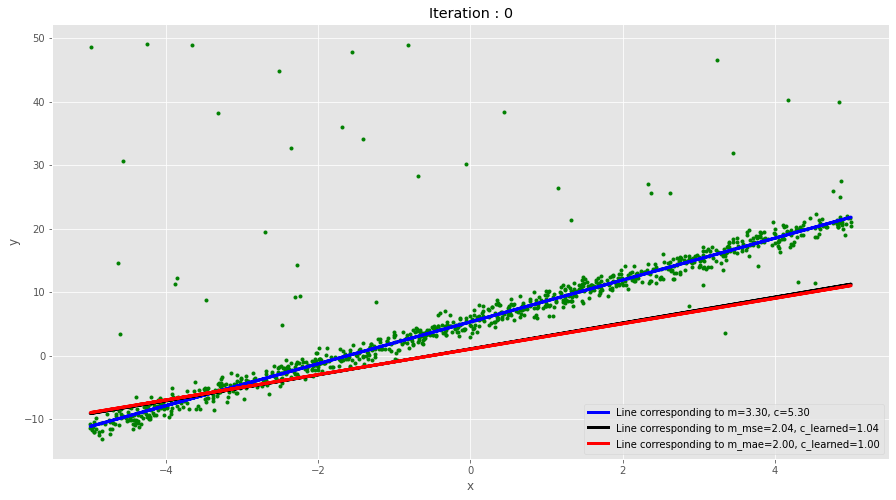

Iteration: 40, 
Loss_mse: 44.569, m_mse: 3.055, c_mse: 2.668
Loss_mae: 5.273, m_mae: 2.206,c_mae: 1.142


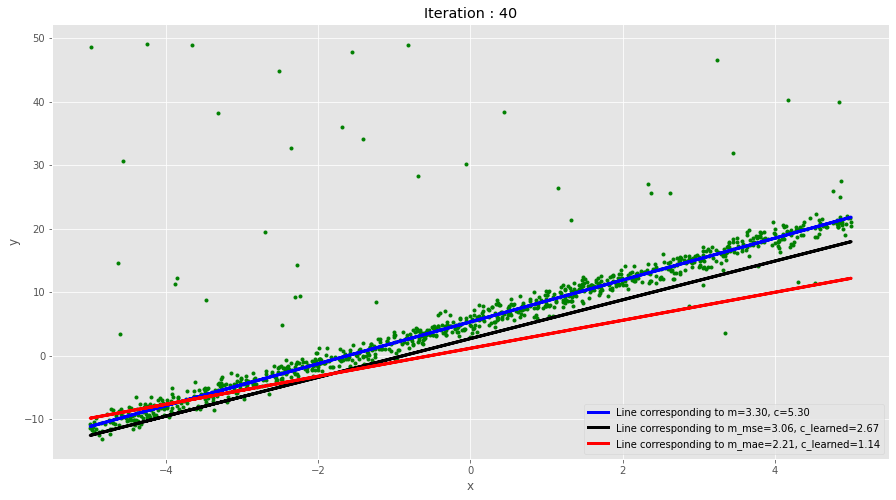

Iteration: 80, 
Loss_mse: 37.935, m_mse: 3.150, c_mse: 3.804
Loss_mae: 5.036, m_mae: 2.348,c_mae: 1.297


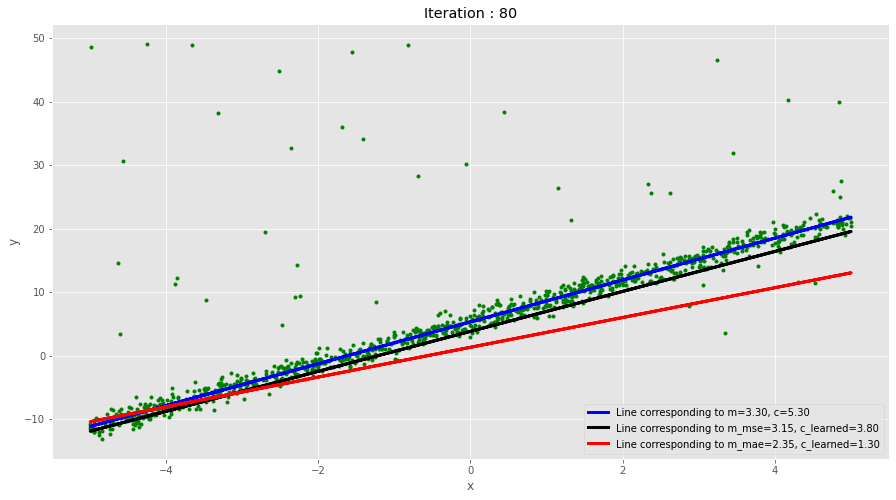

Iteration: 100, 
Loss_mse: 36.030, m_mse: 3.056, c_mse: 4.241
Loss_mae: 4.934, m_mae: 2.388,c_mae: 1.386


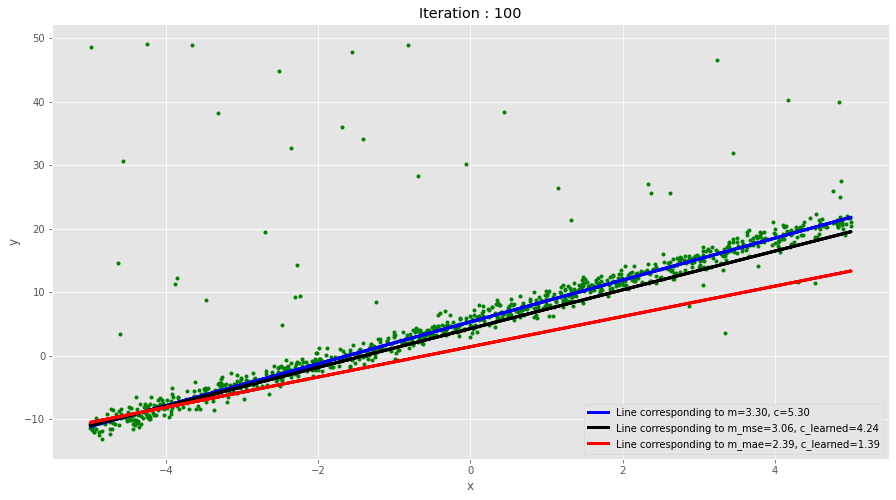

Iteration: 140, 
Loss_mse: 33.783, m_mse: 3.080, c_mse: 4.952
Loss_mae: 4.746, m_mae: 2.480,c_mae: 1.545


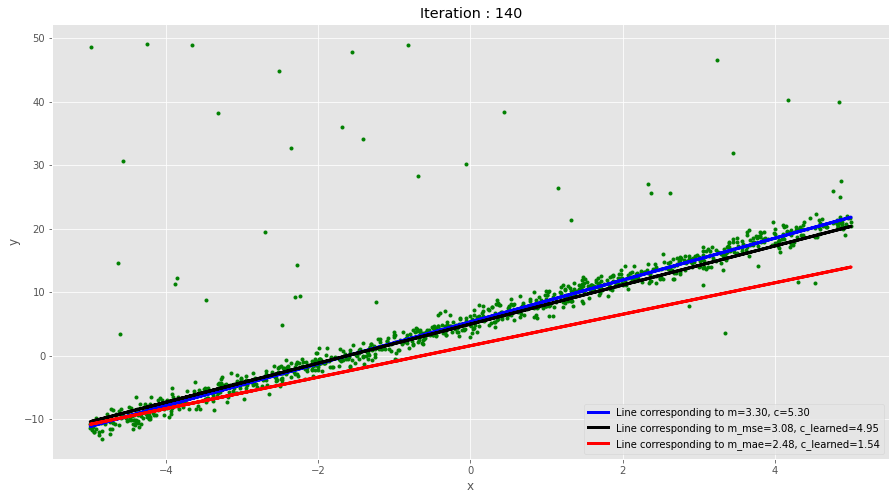

Iteration: 180, 
Loss_mse: 33.044, m_mse: 3.028, c_mse: 5.324
Loss_mae: 4.558, m_mae: 2.555,c_mae: 1.719


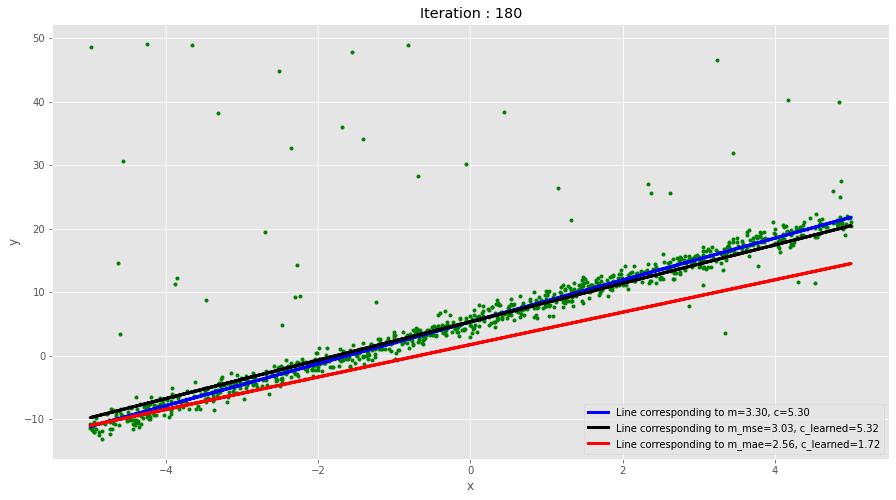

Iteration: 200, 
Loss_mse: 32.829, m_mse: 3.069, c_mse: 5.444
Loss_mae: 4.481, m_mae: 2.561,c_mae: 1.805


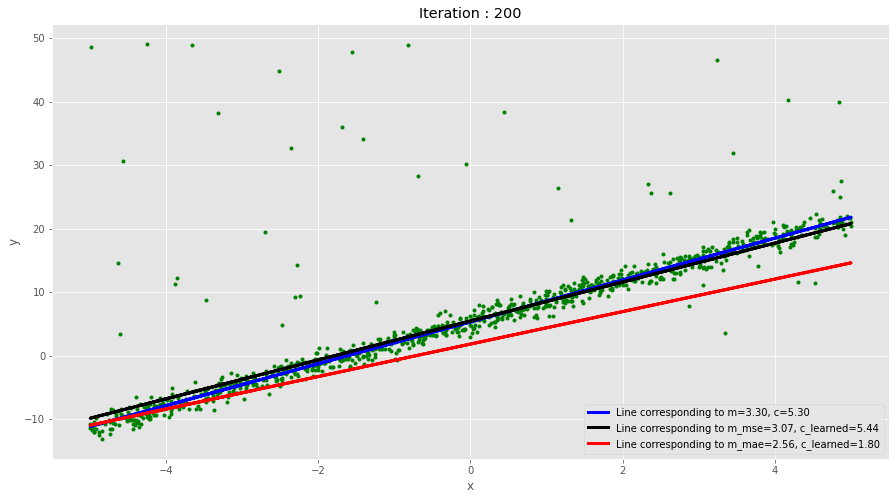

Iteration: 240, 
Loss_mse: 32.734, m_mse: 3.221, c_mse: 5.618
Loss_mae: 4.284, m_mae: 2.671,c_mae: 1.973


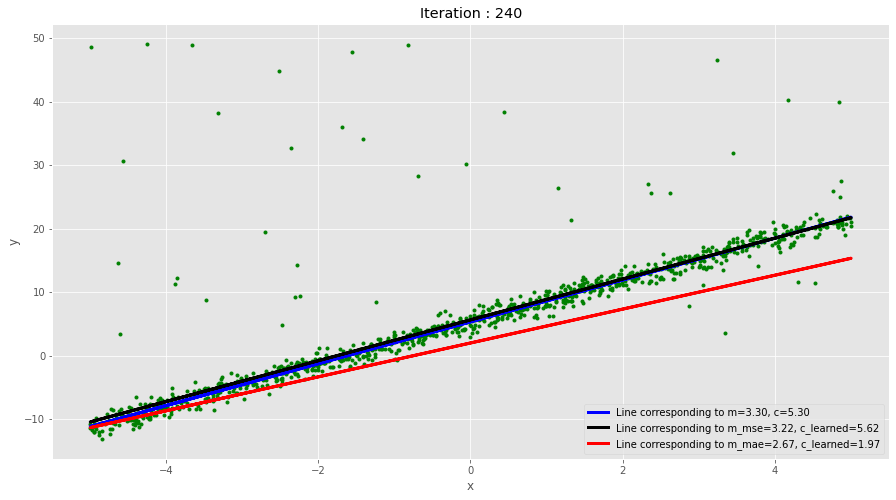

Iteration: 280, 
Loss_mse: 32.446, m_mse: 3.069, c_mse: 5.790
Loss_mae: 4.102, m_mae: 2.741,c_mae: 2.149


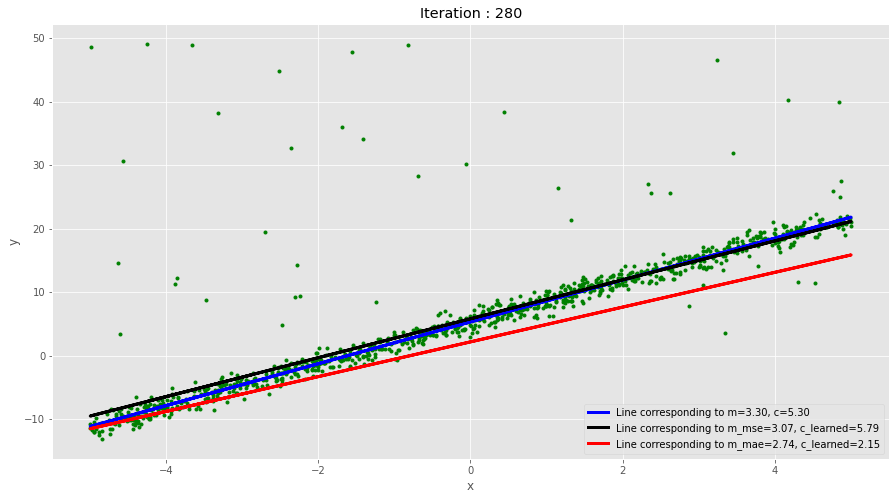

Iteration: 300, 
Loss_mse: 32.390, m_mse: 3.035, c_mse: 5.911
Loss_mae: 4.002, m_mae: 2.788,c_mae: 2.243


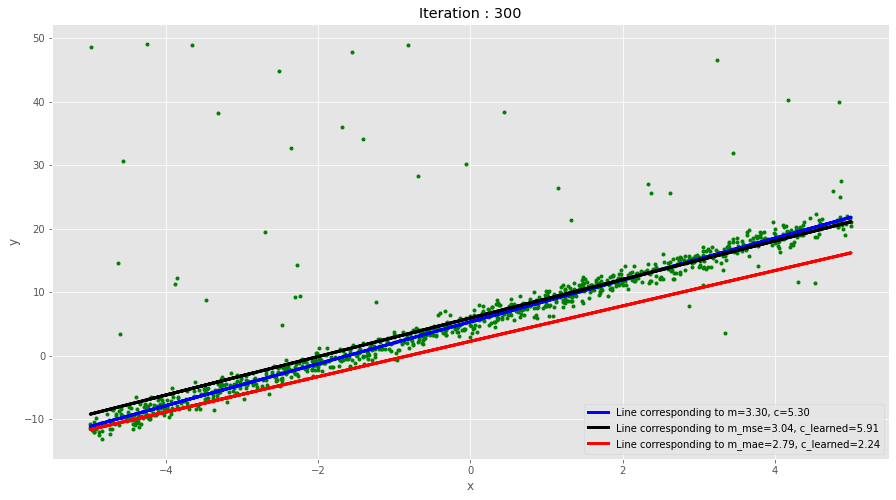

Iteration: 340, 
Loss_mse: 32.705, m_mse: 3.307, c_mse: 5.950
Loss_mae: 3.823, m_mae: 2.845,c_mae: 2.423


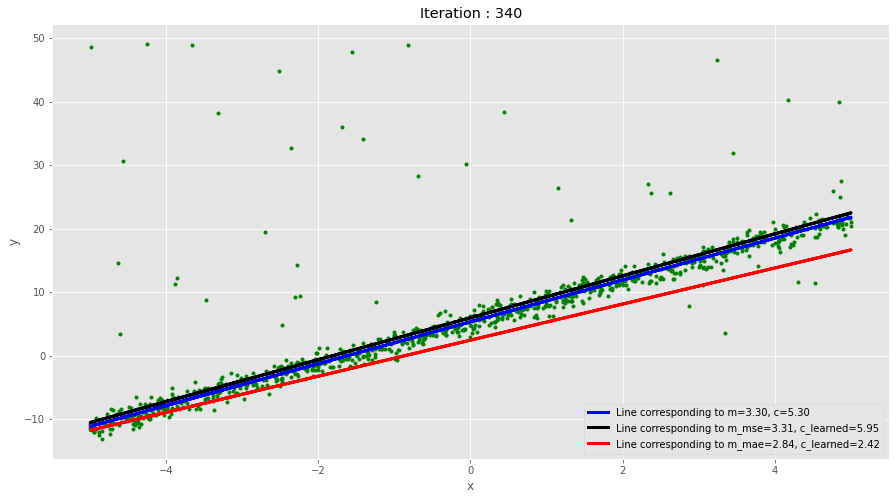

Iteration: 380, 
Loss_mse: 32.433, m_mse: 3.219, c_mse: 6.060
Loss_mae: 3.639, m_mae: 2.899,c_mae: 2.610


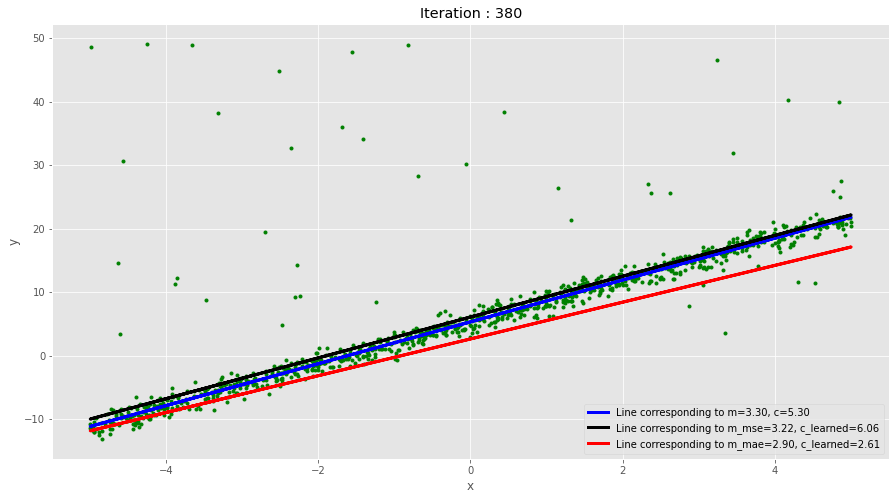

Iteration: 400, 
Loss_mse: 32.318, m_mse: 3.138, c_mse: 6.097
Loss_mae: 3.556, m_mae: 2.912,c_mae: 2.697


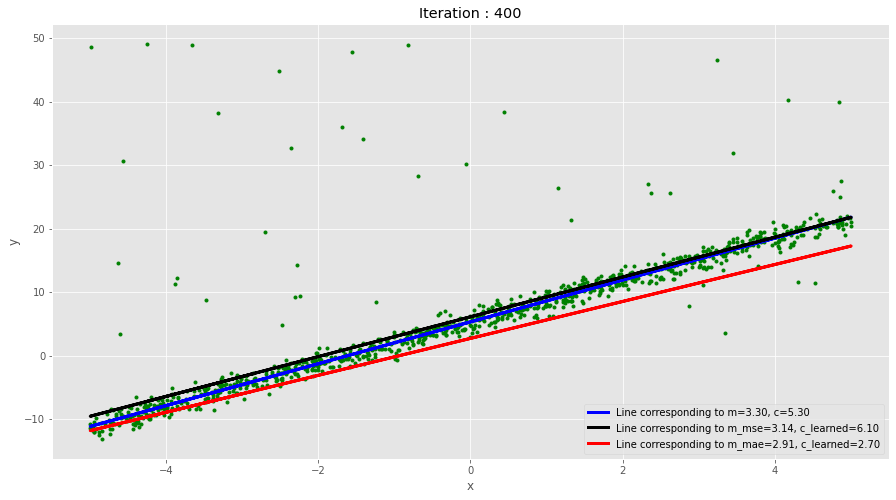

Iteration: 440, 
Loss_mse: 32.326, m_mse: 3.033, c_mse: 6.148
Loss_mae: 3.386, m_mae: 2.951,c_mae: 2.874


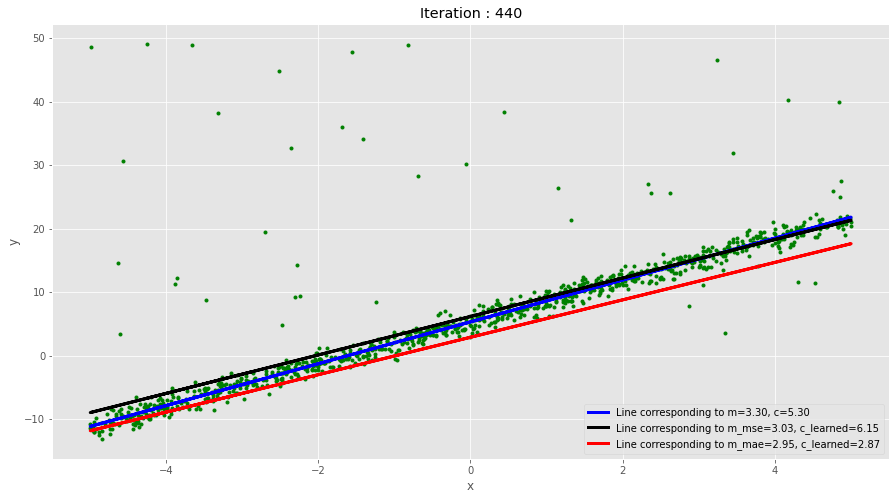

Iteration: 480, 
Loss_mse: 32.345, m_mse: 3.150, c_mse: 6.018
Loss_mae: 3.206, m_mae: 3.023,c_mae: 3.054


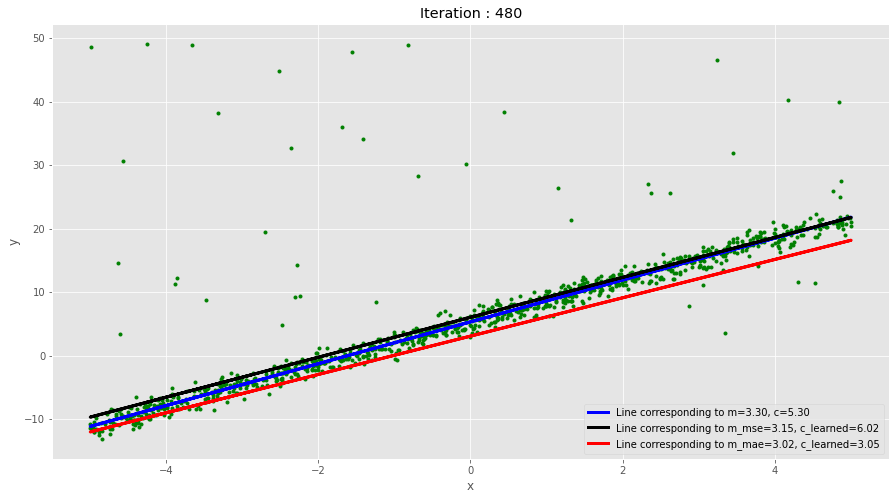

Iteration: 500, 
Loss_mse: 32.357, m_mse: 3.182, c_mse: 6.177
Loss_mae: 3.118, m_mae: 3.049,c_mae: 3.145


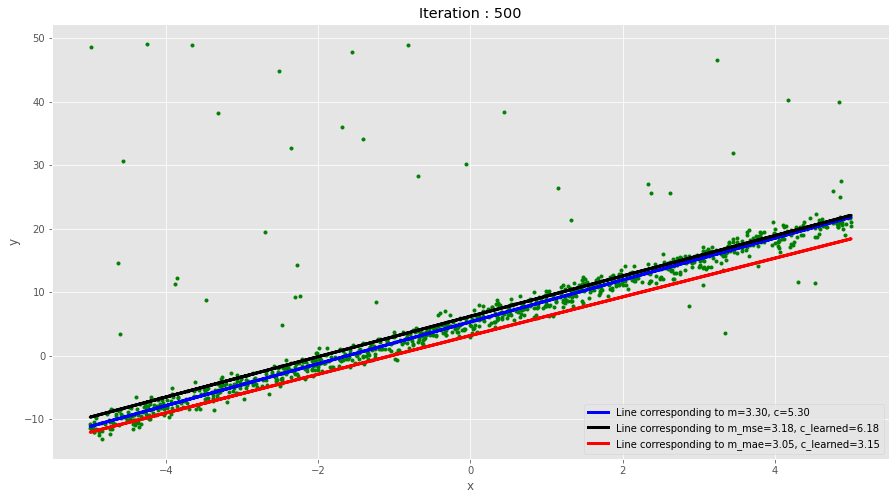

Iteration: 540, 
Loss_mse: 32.300, m_mse: 3.084, c_mse: 6.226
Loss_mae: 2.945, m_mae: 3.104,c_mae: 3.325


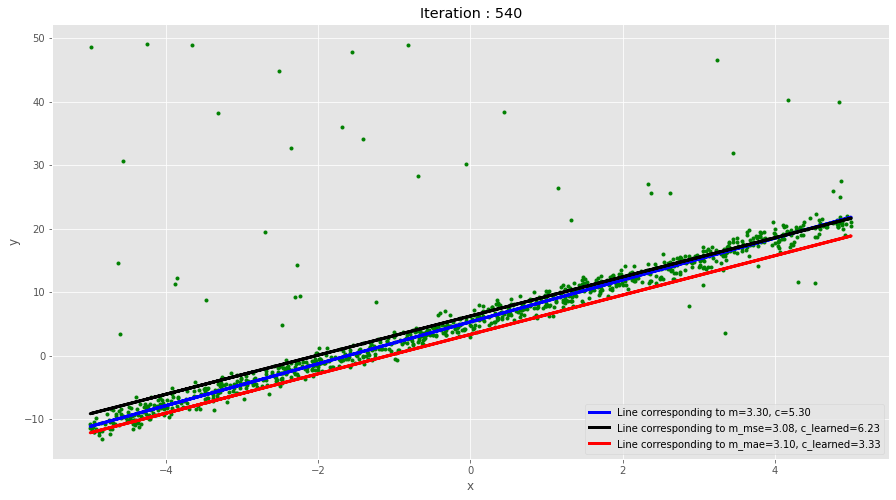

Iteration: 580, 
Loss_mse: 32.504, m_mse: 2.934, c_mse: 6.259
Loss_mae: 2.766, m_mae: 3.167,c_mae: 3.512


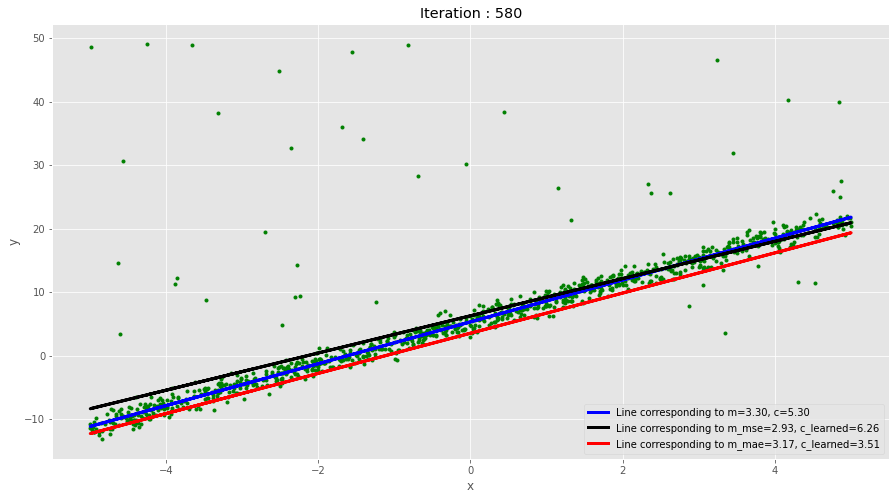

Iteration: 600, 
Loss_mse: 32.408, m_mse: 3.213, c_mse: 6.182
Loss_mae: 2.685, m_mae: 3.188,c_mae: 3.600


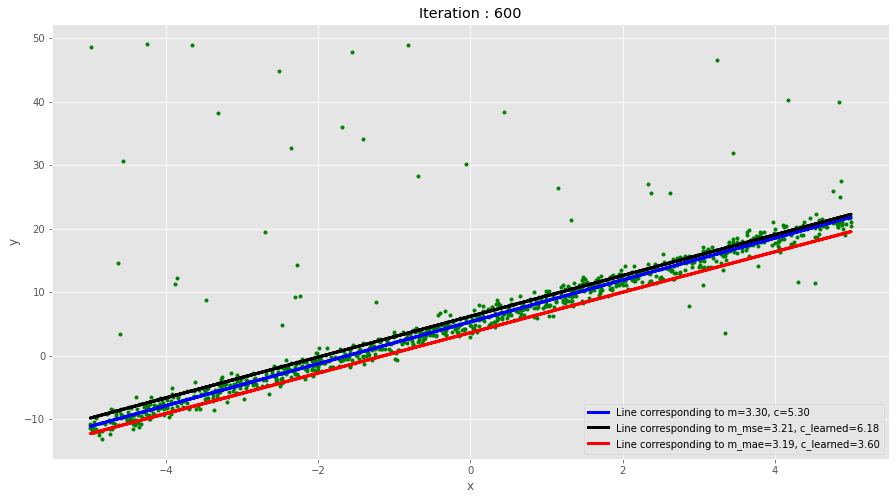

Iteration: 640, 
Loss_mse: 32.452, m_mse: 2.956, c_mse: 6.082
Loss_mae: 2.534, m_mae: 3.214,c_mae: 3.769


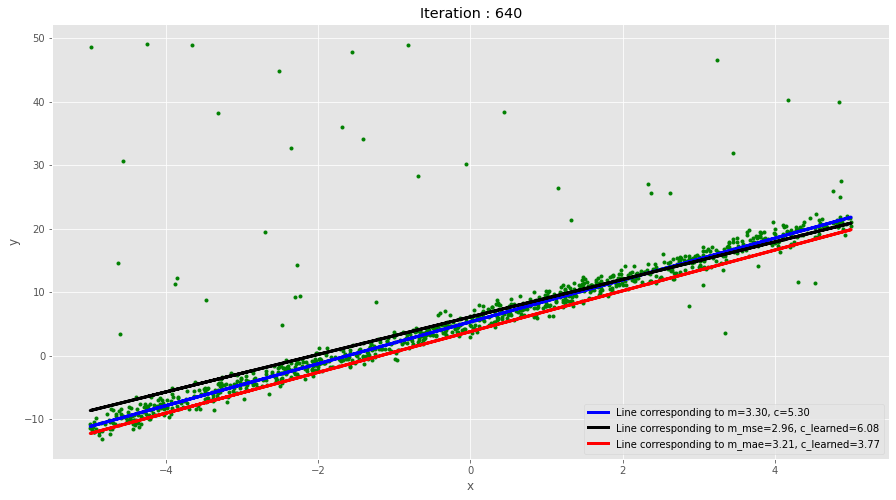

Iteration: 680, 
Loss_mse: 32.494, m_mse: 3.249, c_mse: 6.077
Loss_mae: 2.392, m_mae: 3.244,c_mae: 3.935


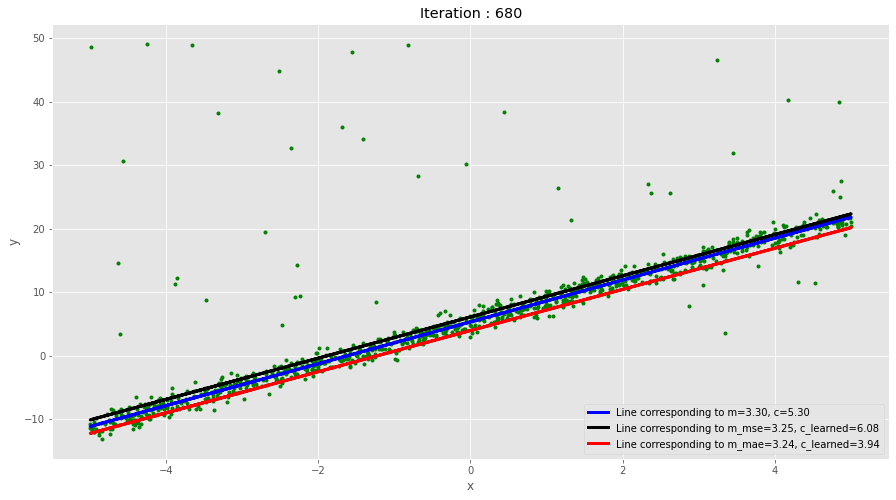

Iteration: 700, 
Loss_mse: 32.315, m_mse: 3.049, c_mse: 6.114
Loss_mae: 2.331, m_mae: 3.259,c_mae: 4.010


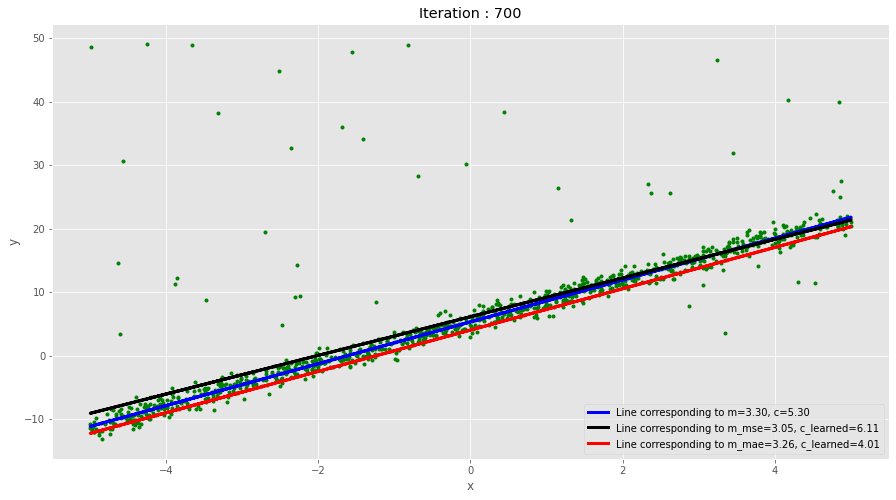

Iteration: 740, 
Loss_mse: 32.422, m_mse: 3.220, c_mse: 6.147
Loss_mae: 2.206, m_mae: 3.287,c_mae: 4.171


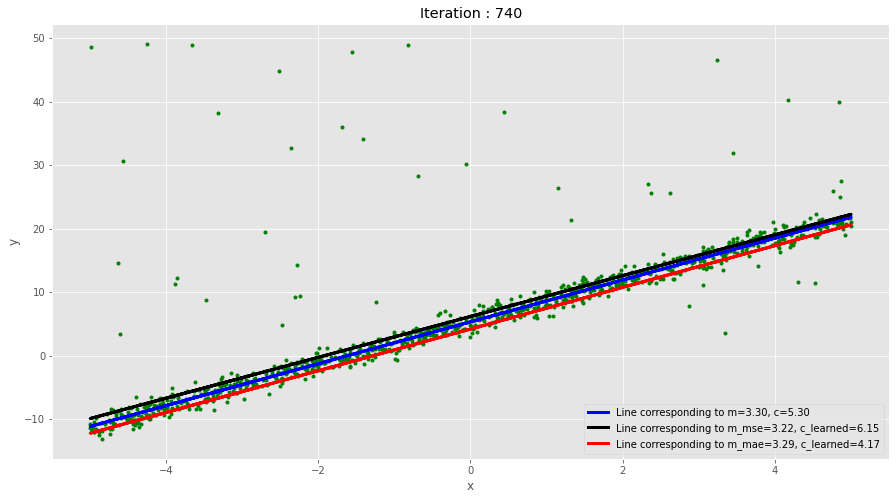

Iteration: 780, 
Loss_mse: 34.449, m_mse: 2.570, c_mse: 6.283
Loss_mae: 2.108, m_mae: 3.270,c_mae: 4.311


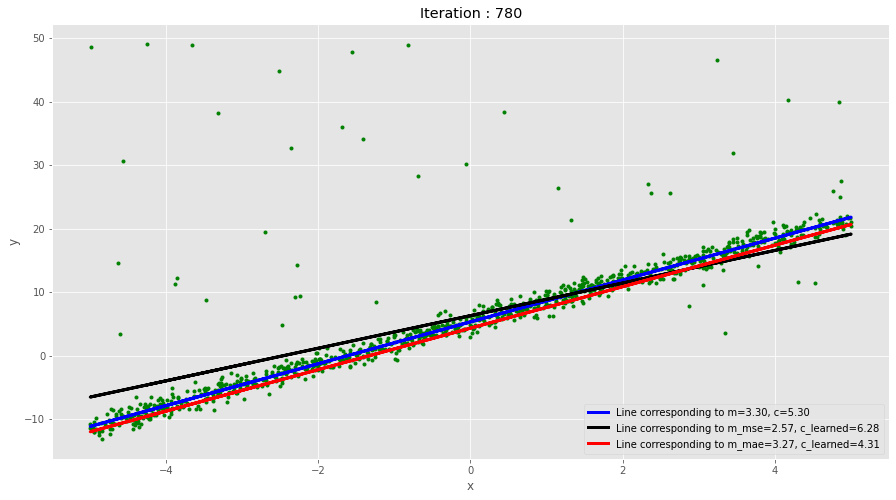

Iteration: 800, 
Loss_mse: 32.534, m_mse: 2.925, c_mse: 6.291
Loss_mae: 2.067, m_mae: 3.271,c_mae: 4.374


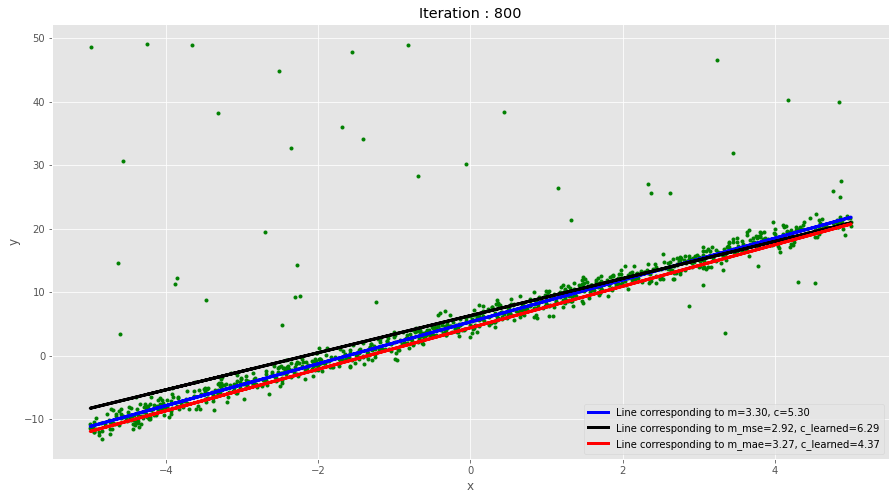

Iteration: 840, 
Loss_mse: 32.300, m_mse: 3.081, c_mse: 6.218
Loss_mae: 1.989, m_mae: 3.279,c_mae: 4.498


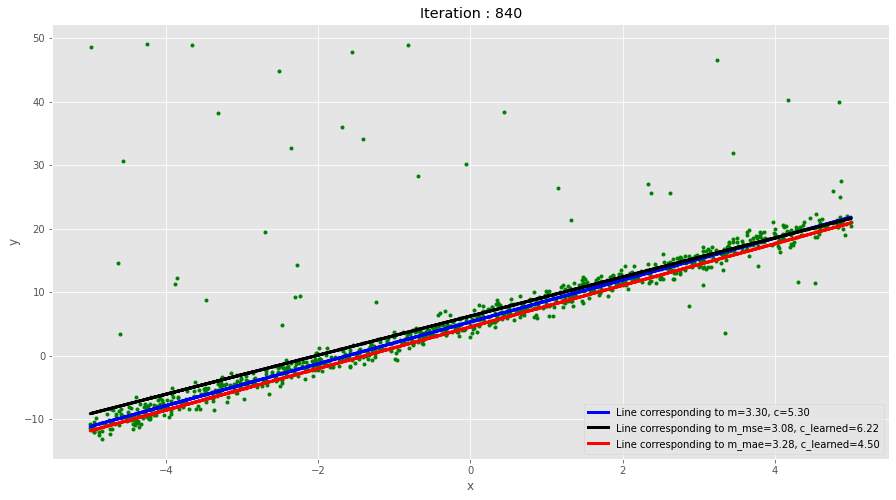

Iteration: 880, 
Loss_mse: 32.468, m_mse: 3.242, c_mse: 6.189
Loss_mae: 1.924, m_mae: 3.288,c_mae: 4.611


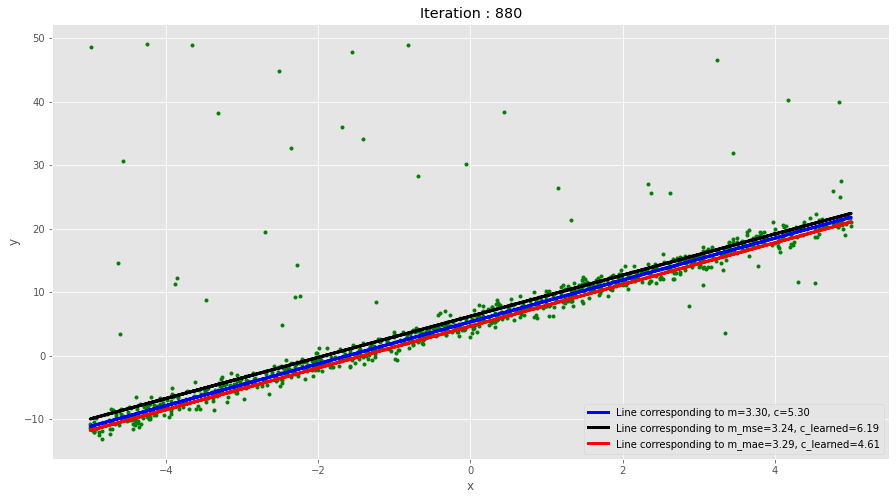

Iteration: 900, 
Loss_mse: 32.492, m_mse: 3.250, c_mse: 6.115
Loss_mae: 1.897, m_mae: 3.289,c_mae: 4.664


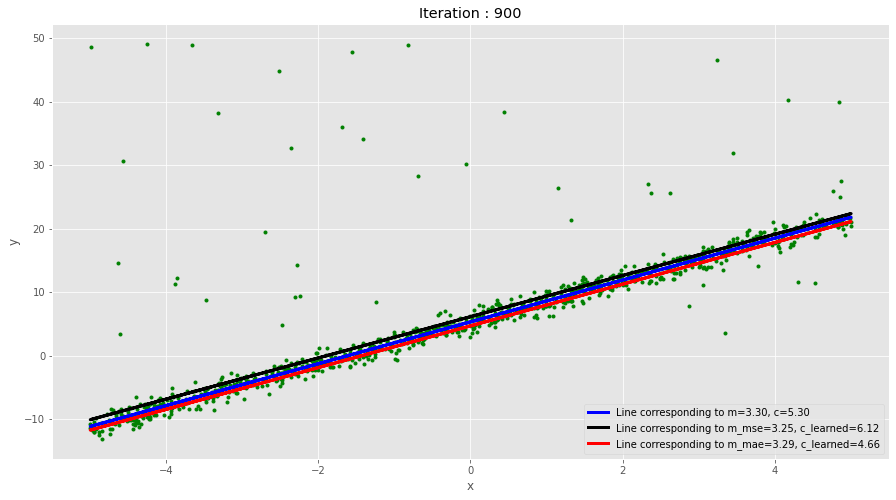

Iteration: 940, 
Loss_mse: 32.353, m_mse: 3.170, c_mse: 6.073
Loss_mae: 1.852, m_mae: 3.331,c_mae: 4.765


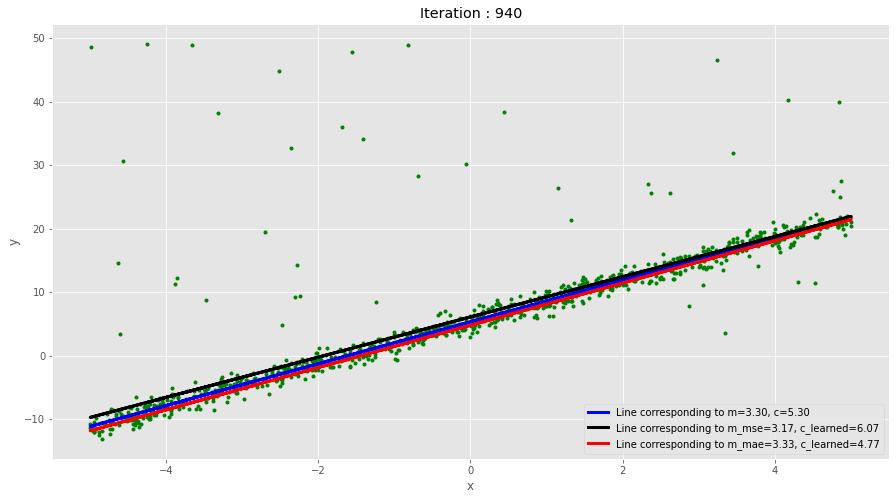

Iteration: 980, 
Loss_mse: 32.321, m_mse: 3.038, c_mse: 6.175
Loss_mae: 1.811, m_mae: 3.312,c_mae: 4.860


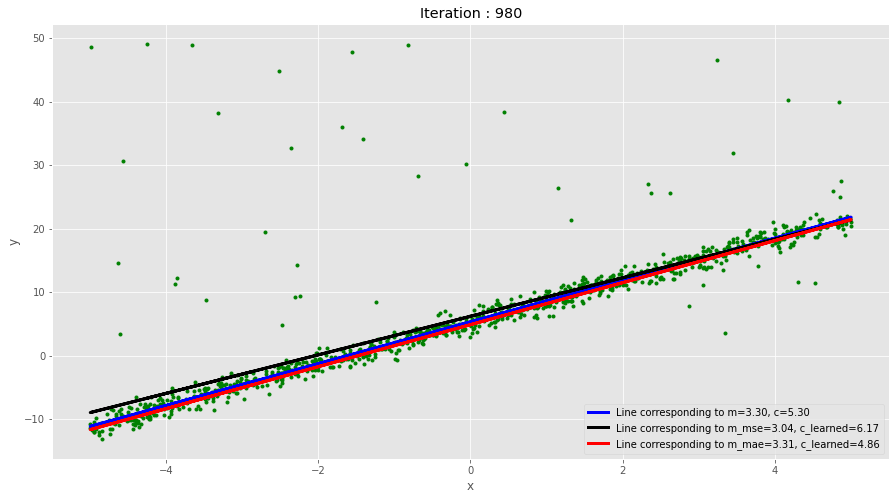

Iteration: 1000, 
Loss_mse: 32.316, m_mse: 3.125, c_mse: 6.060
Loss_mae: 1.798, m_mae: 3.295,c_mae: 4.898


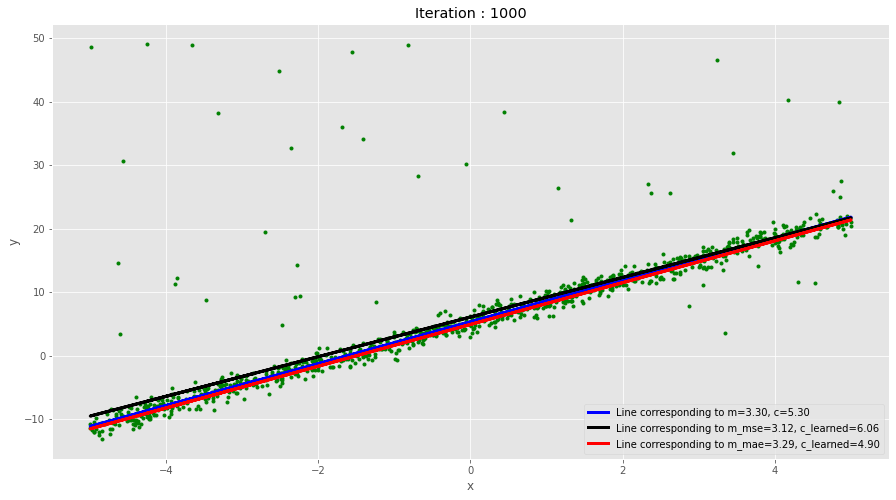

Iteration: 1040, 
Loss_mse: 32.516, m_mse: 3.237, c_mse: 5.934
Loss_mae: 1.776, m_mae: 3.317,c_mae: 4.963


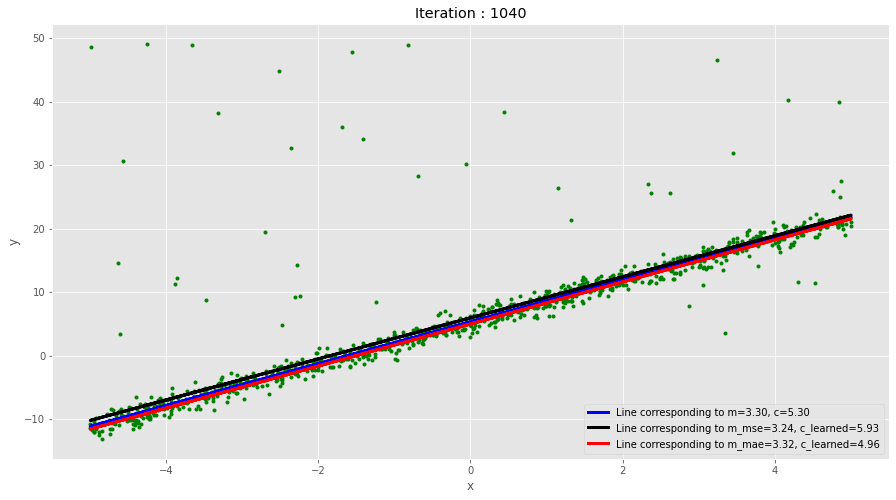

Iteration: 1080, 
Loss_mse: 32.320, m_mse: 3.059, c_mse: 6.051
Loss_mae: 1.759, m_mae: 3.312,c_mae: 5.021


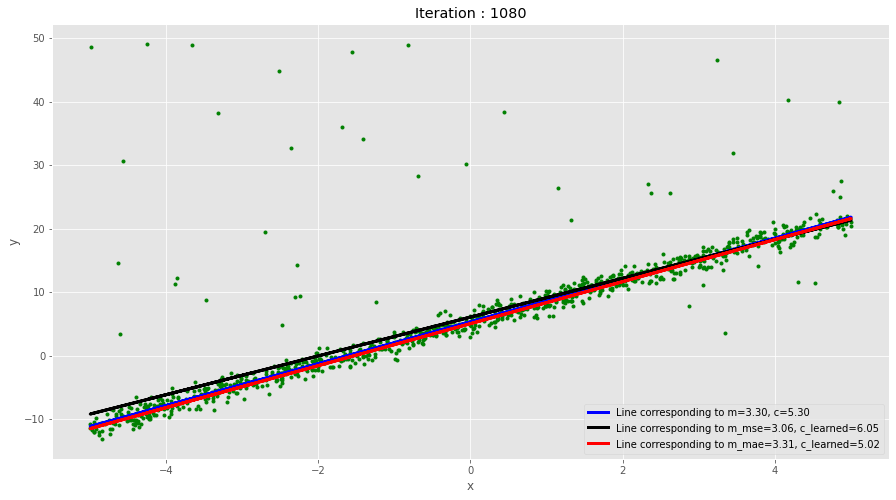

Iteration: 1100, 
Loss_mse: 32.800, m_mse: 3.340, c_mse: 6.003
Loss_mae: 1.750, m_mae: 3.317,c_mae: 5.054


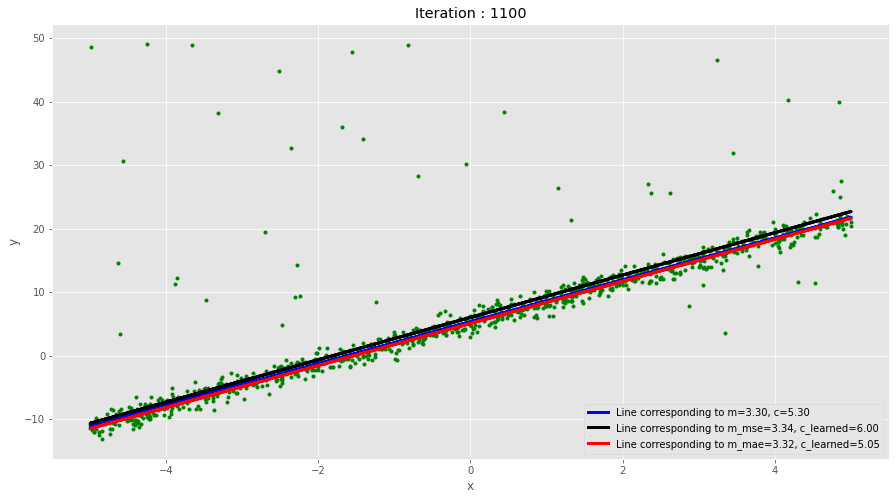

Iteration: 1140, 
Loss_mse: 32.336, m_mse: 3.079, c_mse: 5.975
Loss_mae: 1.741, m_mae: 3.317,c_mae: 5.094


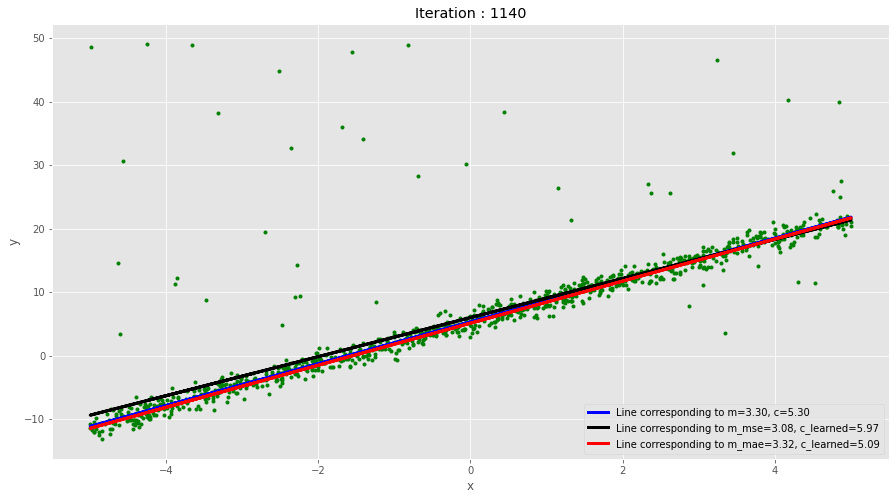

Iteration: 1180, 
Loss_mse: 32.467, m_mse: 3.213, c_mse: 5.933
Loss_mae: 1.734, m_mae: 3.296,c_mae: 5.134


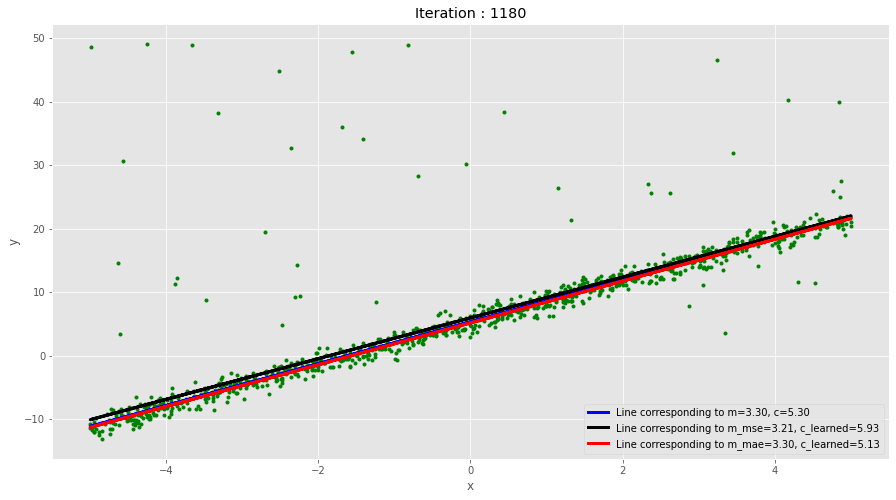

Iteration: 1200, 
Loss_mse: 32.316, m_mse: 3.089, c_mse: 6.033
Loss_mae: 1.731, m_mae: 3.300,c_mae: 5.144


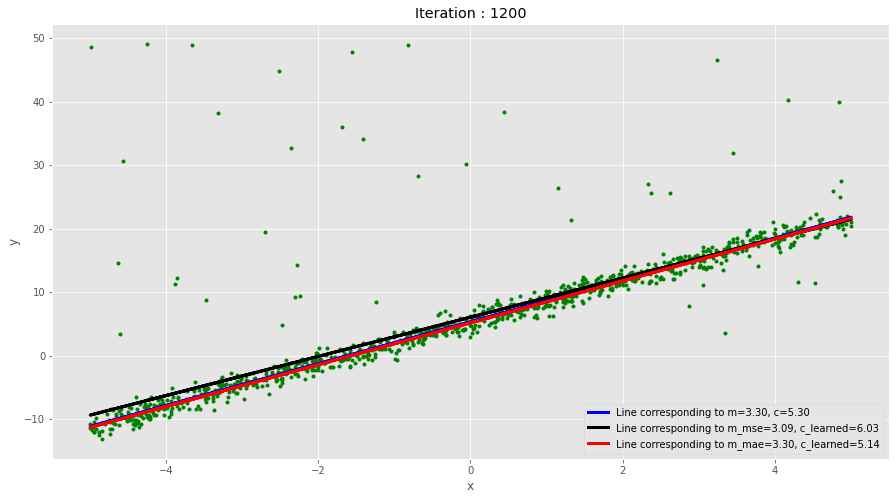

Iteration: 1240, 
Loss_mse: 32.398, m_mse: 3.189, c_mse: 6.002
Loss_mae: 1.724, m_mae: 3.317,c_mae: 5.189


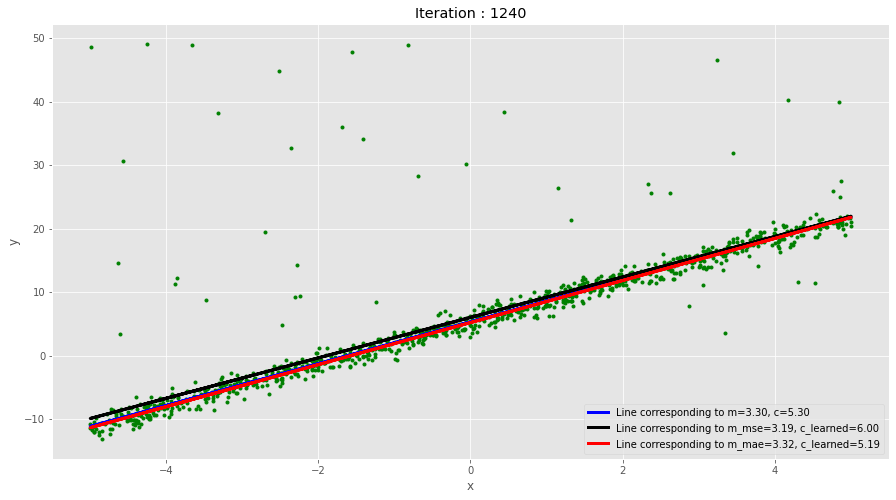

Iteration: 1280, 
Loss_mse: 32.527, m_mse: 3.252, c_mse: 5.988
Loss_mae: 1.719, m_mae: 3.312,c_mae: 5.228


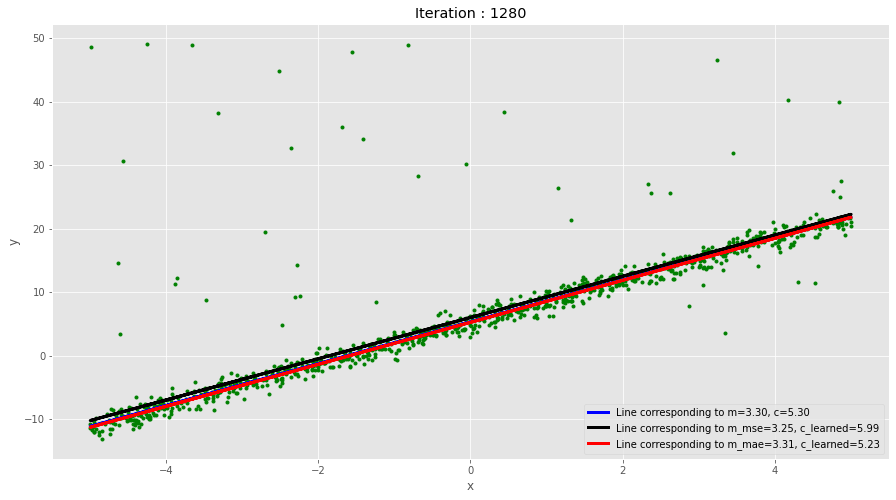

Iteration: 1300, 
Loss_mse: 32.604, m_mse: 2.904, c_mse: 5.996
Loss_mae: 1.720, m_mae: 3.312,c_mae: 5.225


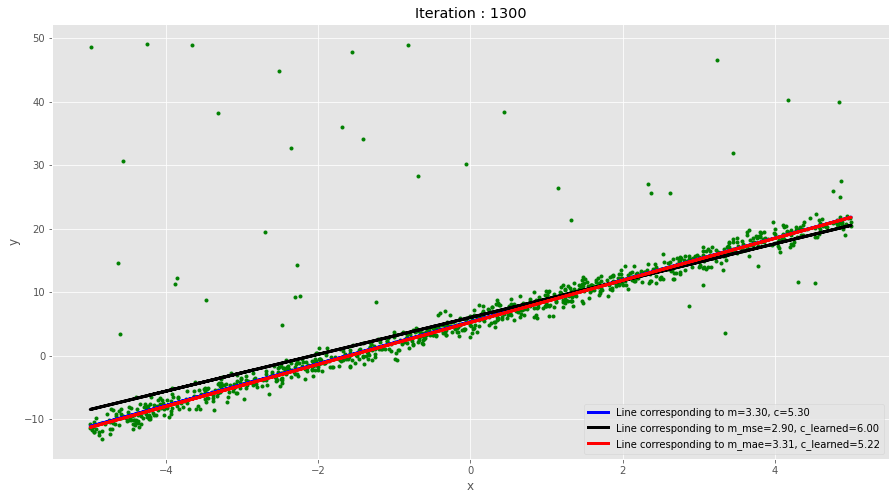

Iteration: 1340, 
Loss_mse: 32.802, m_mse: 2.839, c_mse: 6.157
Loss_mae: 1.717, m_mae: 3.319,c_mae: 5.254


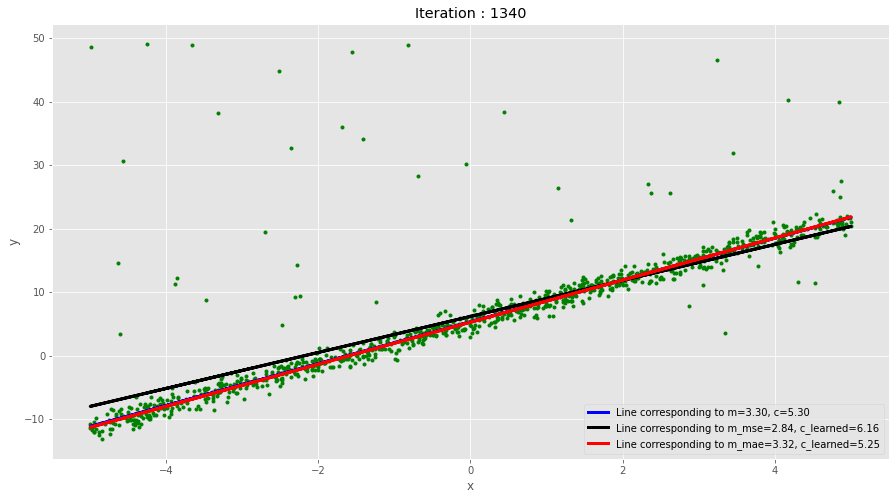

Iteration: 1380, 
Loss_mse: 32.350, m_mse: 3.158, c_mse: 6.029
Loss_mae: 1.720, m_mae: 3.336,c_mae: 5.256


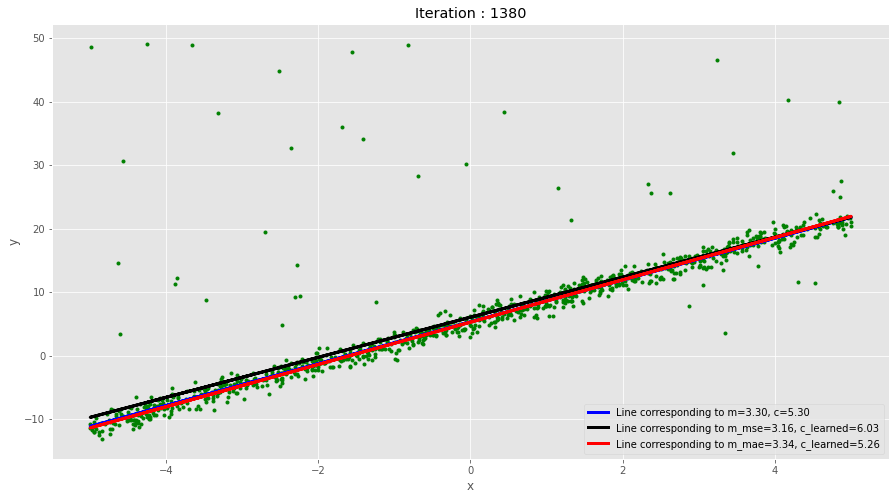

Iteration: 1400, 
Loss_mse: 32.688, m_mse: 2.870, c_mse: 6.126
Loss_mae: 1.715, m_mae: 3.308,c_mae: 5.270


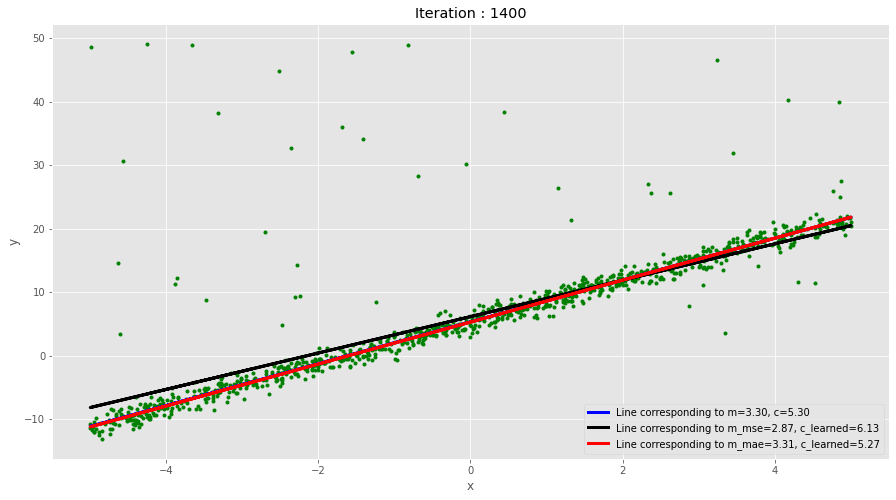

Iteration: 1440, 
Loss_mse: 32.310, m_mse: 3.128, c_mse: 6.111
Loss_mae: 1.716, m_mae: 3.282,c_mae: 5.286


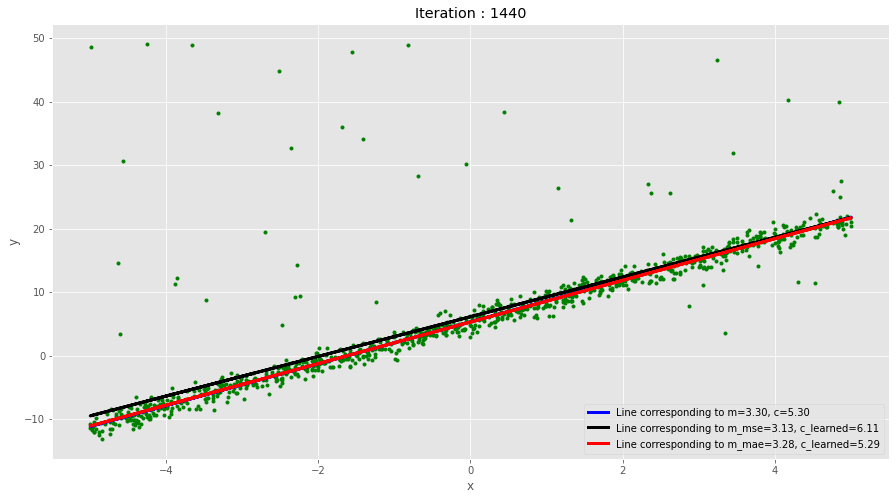

Iteration: 1480, 
Loss_mse: 32.397, m_mse: 3.206, c_mse: 6.124
Loss_mae: 1.714, m_mae: 3.302,c_mae: 5.288


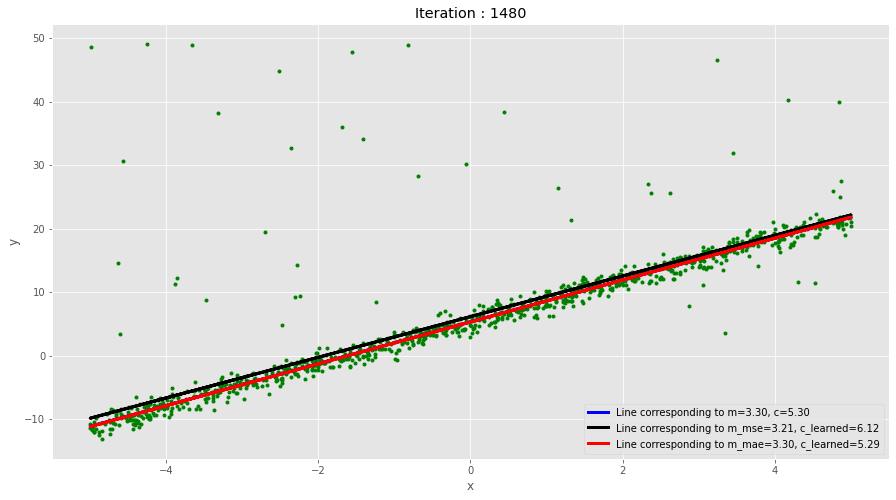

Iteration: 1500, 
Loss_mse: 32.317, m_mse: 3.092, c_mse: 6.314
Loss_mae: 1.713, m_mae: 3.312,c_mae: 5.304


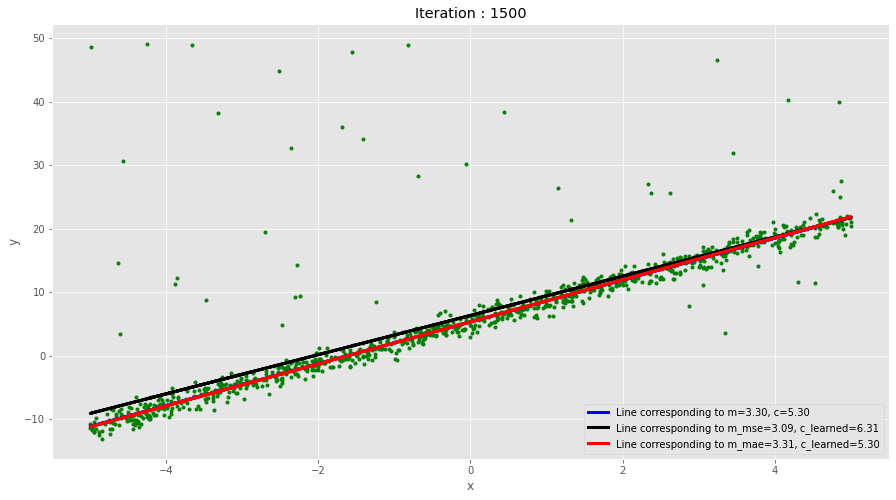

Iteration: 1540, 
Loss_mse: 32.322, m_mse: 3.070, c_mse: 6.316
Loss_mae: 1.712, m_mae: 3.300,c_mae: 5.331


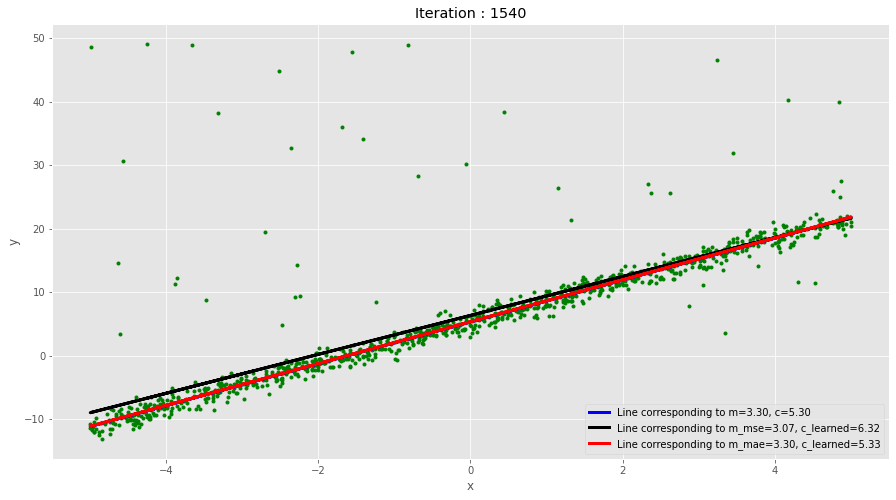

Iteration: 1580, 
Loss_mse: 32.421, m_mse: 3.196, c_mse: 6.384
Loss_mae: 1.712, m_mae: 3.305,c_mae: 5.344


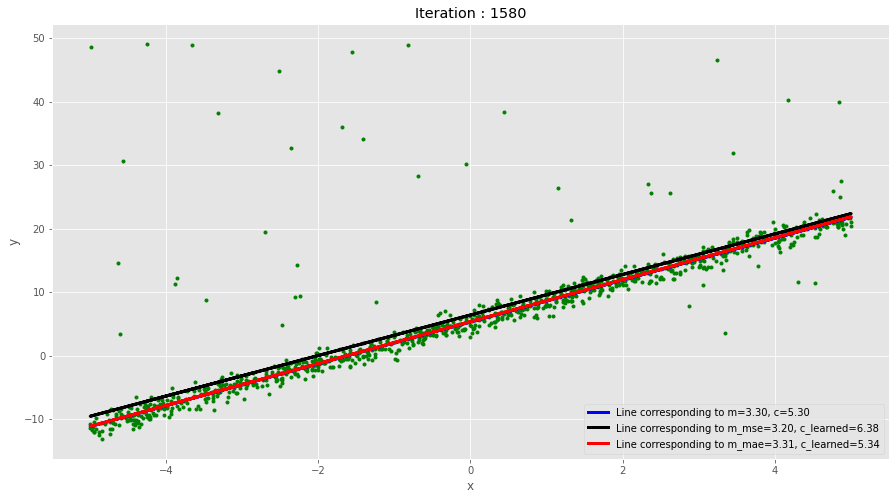

Iteration: 1600, 
Loss_mse: 32.346, m_mse: 3.068, c_mse: 6.382
Loss_mae: 1.712, m_mae: 3.301,c_mae: 5.359


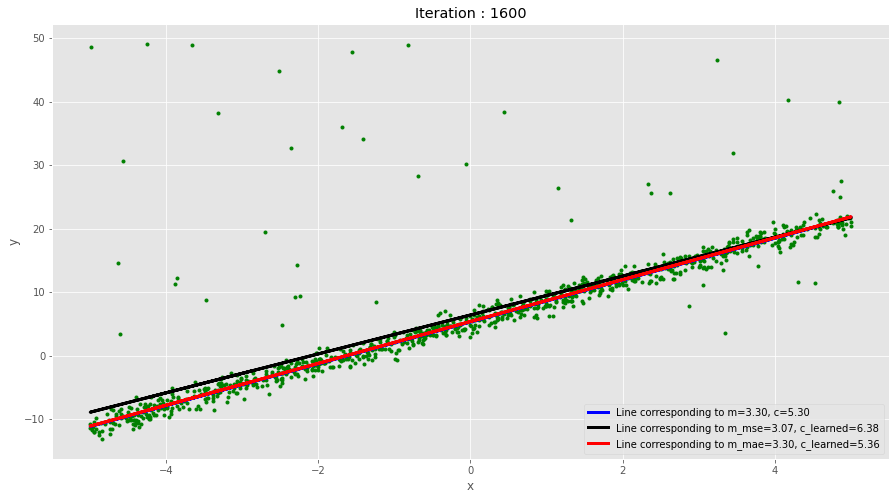

Iteration: 1640, 
Loss_mse: 32.340, m_mse: 3.035, c_mse: 6.299
Loss_mae: 1.712, m_mae: 3.308,c_mae: 5.356


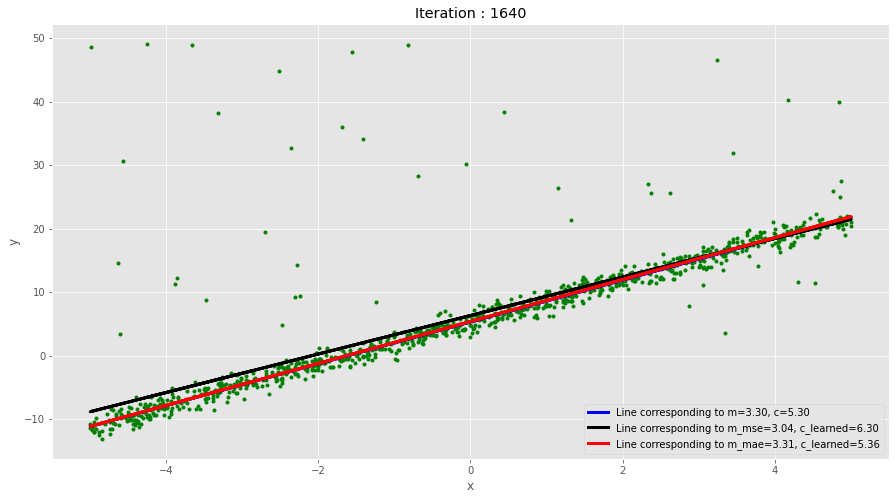

Iteration: 1680, 
Loss_mse: 32.306, m_mse: 3.103, c_mse: 6.268
Loss_mae: 1.712, m_mae: 3.311,c_mae: 5.352


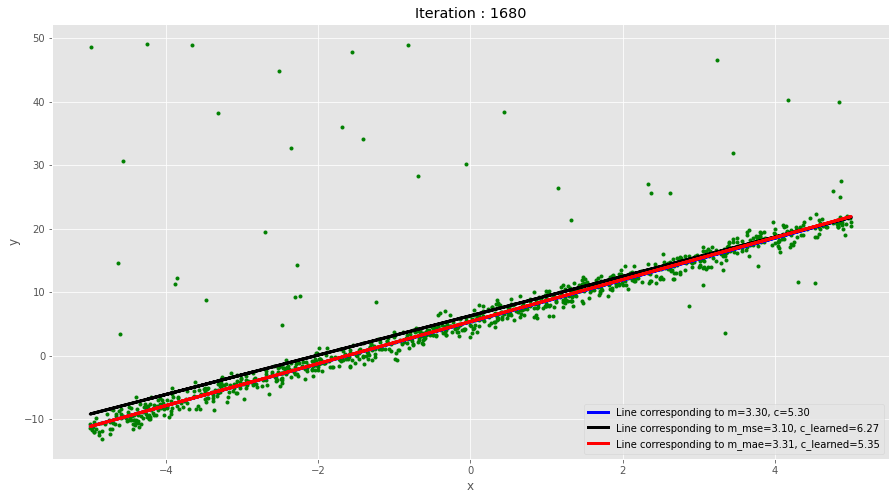

Iteration: 1700, 
Loss_mse: 32.434, m_mse: 3.226, c_mse: 6.157
Loss_mae: 1.714, m_mae: 3.327,c_mae: 5.344


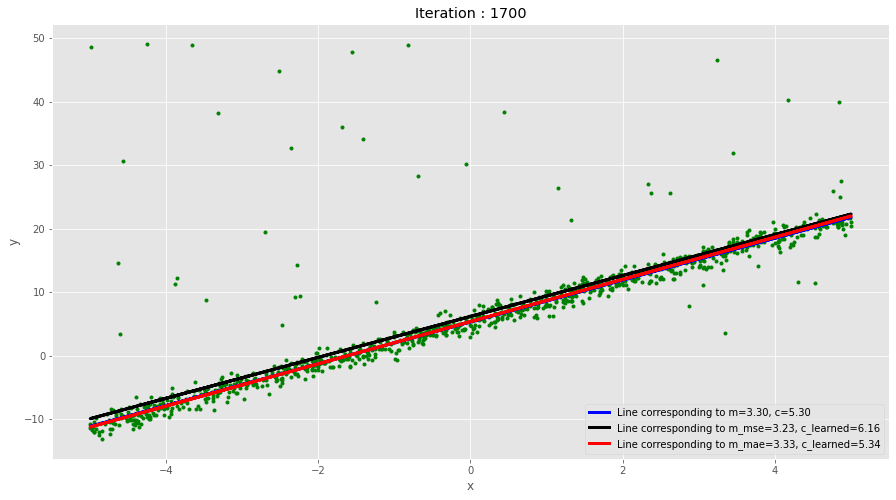

Iteration: 1740, 
Loss_mse: 32.526, m_mse: 2.933, c_mse: 6.335
Loss_mae: 1.713, m_mae: 3.289,c_mae: 5.333


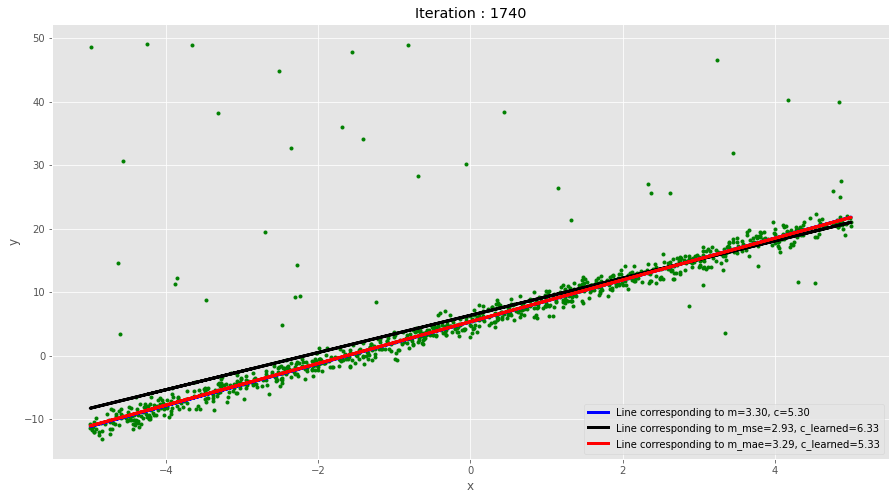

Iteration: 1780, 
Loss_mse: 32.486, m_mse: 3.244, c_mse: 6.058
Loss_mae: 1.712, m_mae: 3.301,c_mae: 5.323


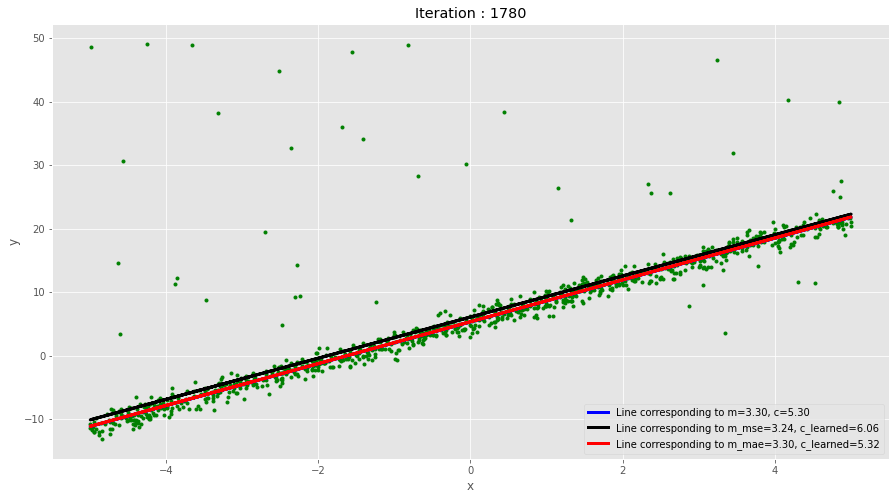

Iteration: 1800, 
Loss_mse: 32.342, m_mse: 3.166, c_mse: 6.107
Loss_mae: 1.712, m_mae: 3.300,c_mae: 5.327


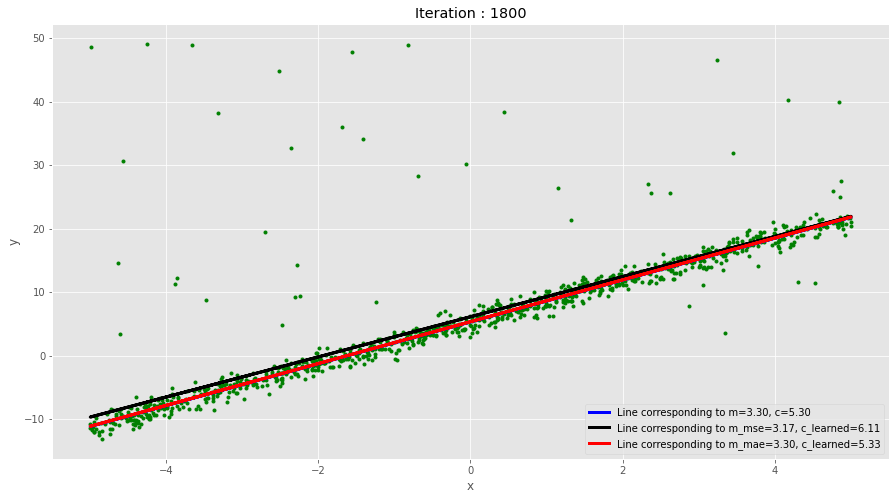

Iteration: 1840, 
Loss_mse: 33.232, m_mse: 2.747, c_mse: 6.195
Loss_mae: 1.713, m_mae: 3.288,c_mae: 5.325


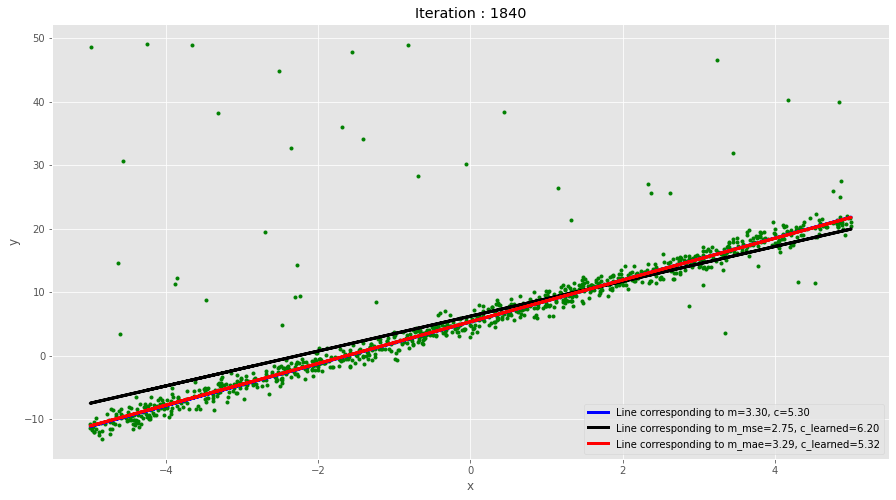

Iteration: 1880, 
Loss_mse: 32.421, m_mse: 3.220, c_mse: 6.158
Loss_mae: 1.712, m_mae: 3.294,c_mae: 5.328


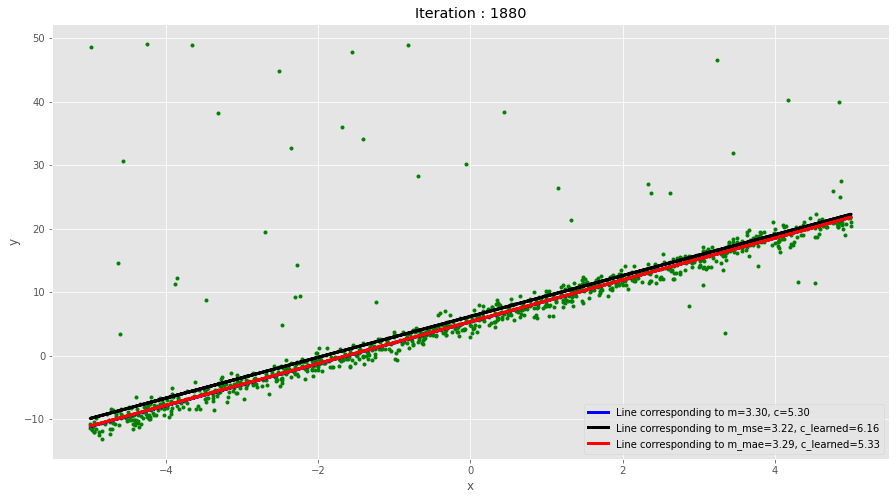

Iteration: 1900, 
Loss_mse: 32.585, m_mse: 2.906, c_mse: 6.291
Loss_mae: 1.712, m_mae: 3.296,c_mae: 5.335


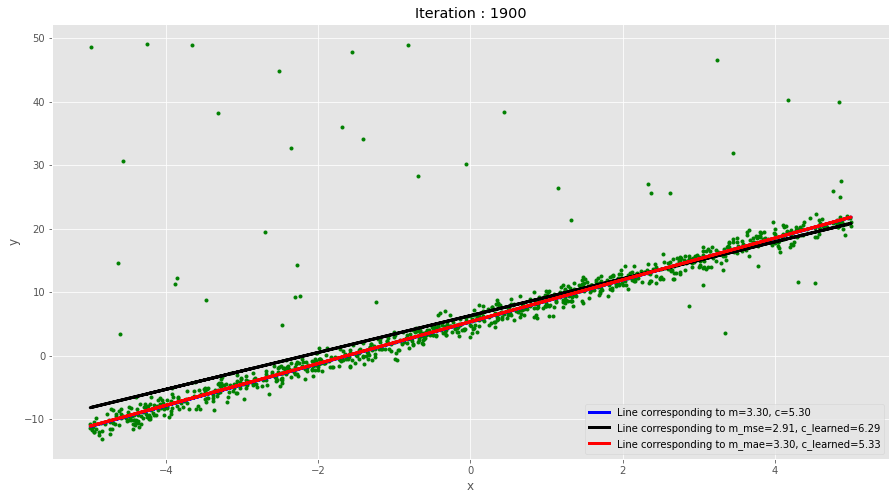

Iteration: 1940, 
Loss_mse: 32.701, m_mse: 3.320, c_mse: 6.126
Loss_mae: 1.712, m_mae: 3.310,c_mae: 5.330


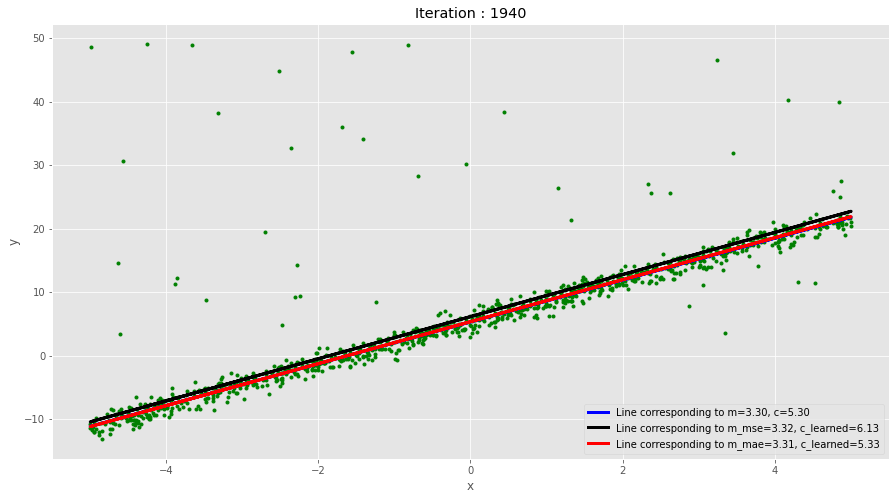

Iteration: 1980, 
Loss_mse: 32.715, m_mse: 2.863, c_mse: 6.240
Loss_mae: 1.713, m_mae: 3.289,c_mae: 5.341


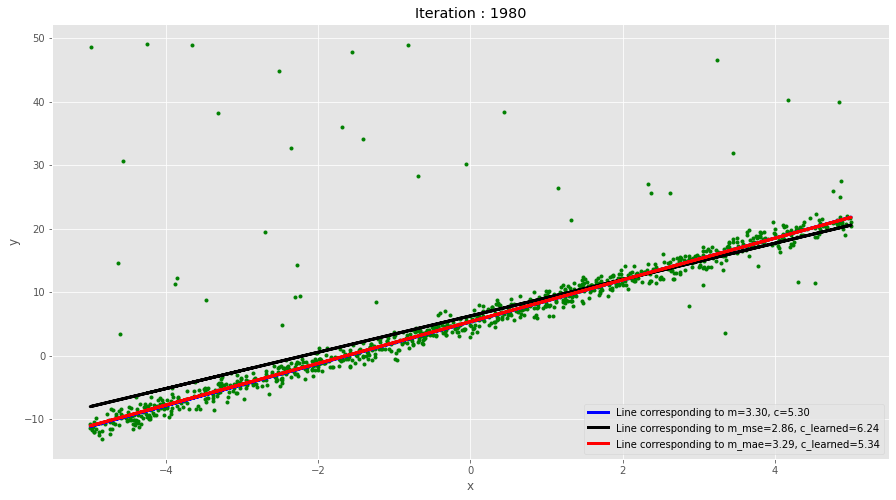

In [33]:
# inputs
inputs = x

# output/labels
labels = y_label

# labels around y
labels_origin = y

# epoch 
epoch=20

# learning rate
lr = 0.005

# batch size
batch_size=10

# dislpay plot count
display_count=40

# inital m
initial_m = 2

# initail c
initial_c = 1

grad_fun_m_c_list = [gradient_wrt_m_and_c_mse, gradient_wrt_m_and_c_mae]

loss_fun_list = [MSE_loss, MAE_loss]

m, c, loss, final_iteration = train(inputs, labels, labels_origin, initial_m, initial_c, grad_fun_m_c_list, 
                                    loss_fun_list, lr, batch_size, epoch, display_count)

--------------------------
Final plots
--------------------------
Iteration: 1999, 
Loss_mse: 32.578, m_mse: 3.279, c_mse: 6.058
Loss_mae: 1.713, m_mae: 3.317,c_mae: 5.328


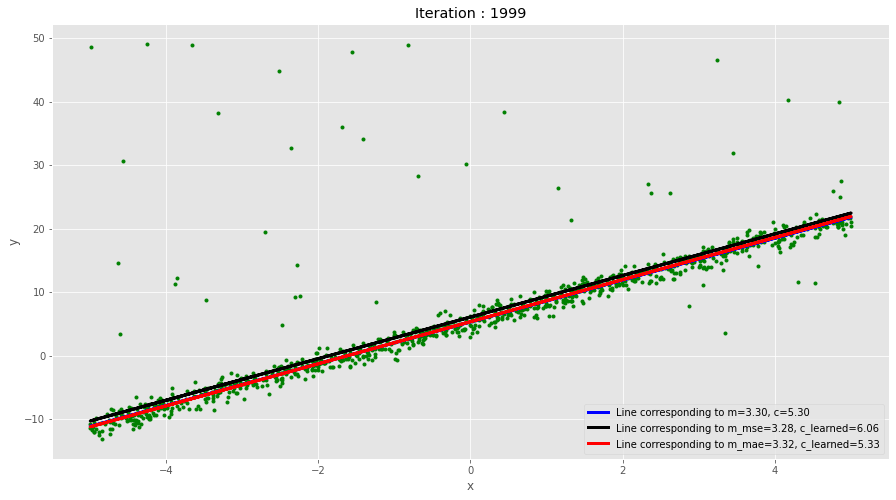

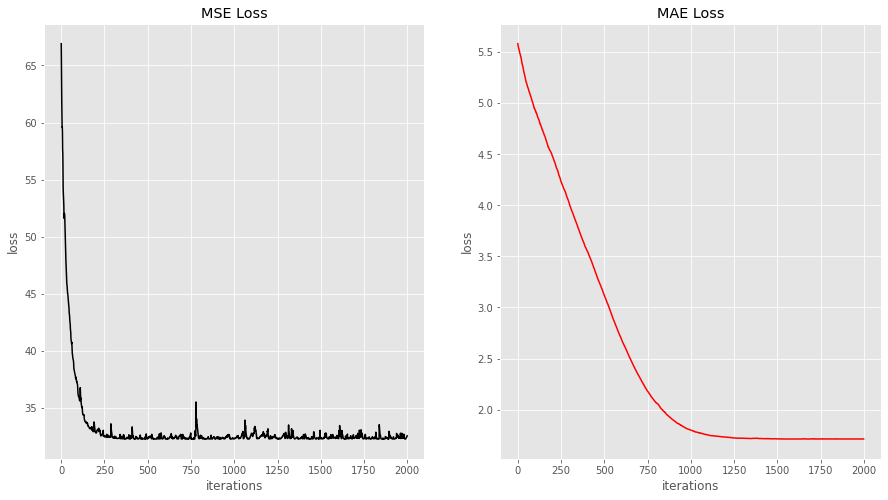

In [34]:
print('{0}\nFinal plots\n{0}'.format('--------------------------'))

display_training(inputs, labels_origin, labels, loss, m, c, iteration=final_iteration)

plot_loss(loss)


**In the above plot, we can observe that the line learned with mean square error deviated more compare to mean absolute error.**